### <span style='color:#40E0D0'> Objetivo:

Realização de desafio de dados tabulares (Body Fat percentage prediction), onde utilizaremos um algoritmo de regressão para prever a variável 'BodyFat'.
Com enfoque na compreensão da problemática e trazer principalmente:

- Insights durante o notebook, adotarei a cor vermelha. Ex: <span style='color:red'> Insight
- Características dos dados que chamaram minha atenção.
- Interpretação adotarei a cor verde. Ex: <span style='color:green'> Interpretação

<hr>

### <span style='color:#40E0D0'> Observação:

Como as bases já foram disponibilizadas separadamente em **'train'** e **'test'**, irei apenas atribuir a elas suas respectivas variáveis preditoras e sua variável target.
<br>

Com isso, não realizaremos a etapa de <span style='color:#40E0D0'> Separação de Bases </span>.

<hr>

### <span style='color:#40E0D0'> 1° Vista dos dados:

Trazendo bibliotecas:

In [ ]:
# Importando bibliotecas inicias:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Lendo os dados:

In [ ]:
# lendo train.csv
df_body_fat = pd.read_csv('./dados/train.csv')

# Espiando o head
df_body_fat.head()

,AdiposeTissue,Density,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,BodyFat
0,29.9,1.0316,65.0,189.75,65.75,40.8,106.4,100.5,100.5,NaN,38.1,24.0,35.9,NaN,19.1,29.9
1,27.0,1.0378,72.0,168.00,69.25,38.5,101.4,99.8,96.2,56.3,36.6,22.0,29.7,26.3,18.0,27.0
2,8.8,1.0790,29.0,160.75,69.00,36.7,97.4,83.5,98.7,58.9,35.3,22.6,30.1,26.7,17.6,8.8
3,34.3,1.0180,35.0,228.25,NaN,40.4,114.9,115.9,111.9,74.4,NaN,24.0,36.1,31.8,18.8,34.3
4,20.3,1.0525,35.0,224.75,72.25,43.9,NaN,100.4,106.8,63.3,41.7,24.6,37.2,33.1,19.8,20.3


Conhecendo mais sobre os dados:

In [ ]:
# Linhas e colunas
print(f'Temos: {df_body_fat.shape[0]} Linhas e {df_body_fat.shape[1]} Colunas')

Temos: 176 Linhas e 16 Colunas


In [ ]:
# Olhando por cima: qtnd colunas, colunas , val faltantes e dtypes
df_body_fat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AdiposeTissue  147 non-null    float64
 1   Density        158 non-null    float64
 2   Age            152 non-null    float64
 3   Weight         162 non-null    float64
 4   Height         146 non-null    float64
 5   Neck           151 non-null    float64
 6   Chest          140 non-null    float64
 7   Abdomen        150 non-null    float64
 8   Hip            144 non-null    float64
 9   Thigh          147 non-null    float64
 10  Knee           148 non-null    float64
 11  Ankle          146 non-null    float64
 12  Biceps         144 non-null    float64
 13  Forearm        148 non-null    float64
 14  Wrist          155 non-null    float64
 15  BodyFat        176 non-null    float64
dtypes: float64(16)
memory usage: 22.1 KB


Olhando um pouco mais sobre os dados faltantes:

In [ ]:
# Conhecendo os dados faltantes por coluna. Trataremos posteriormente tais valores faltantes.
df_body_fat.isnull().sum()

AdiposeTissue    29
Density          18
Age              24
Weight           14
Height           30
Neck             25
Chest            36
Abdomen          26
Hip              32
Thigh            29
Knee             28
Ankle            30
Biceps           32
Forearm          28
Wrist            21
BodyFat           0
dtype: int64

Conhecendo se há linhas completamente duplicadas:

In [ ]:
# Retornando df de valores booleanos e somando: encontraremos se há algum valor duplicado
df_body_fat.duplicated().sum()

0

<span style='color:#40E0D0'> Tradução das features:

In [ ]:
df_body_fat.columns

Index(['AdiposeTissue', 'Density', 'Age', 'Weight', 'Height', 'Neck', 'Chest',
       'Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm',
       'Wrist', 'BodyFat'],
      dtype='object')

- Tecido Adiposo
- Densidade
- Idade (anos)
- Peso (lbs)
- Altura (polegadas)
- Circunferência do pescoço (cm)
- Circunferência torácica (cm)
- Circunferência Abdome (cm)
- Circunferência do quadril (cm)
- Circunferência da coxa (cm)
- Circunferência do joelho (cm)
- Circunferência do tornozelo (cm)
- Circunferência do bíceps (estendida) (cm)
- Circunferência do antebraço (cm)
- Circunferência do punho (cm)
- Percentual Gordura Corporal -> **Variável Target**

As unidades de medidas vão ser mantidas, por enquanto pois realizaremos a normalização dos dados posteriormente ao tratamento dos valores faltantes.

<span style='color:green'> Interpretação  </span> | Aprofundando sobre os dados lidos:

Buscando conhecimentos na área com amigo nutricionista e leituras... pude visualizar que tais dados referentes às circunferências estão relacionados aos valores das **Dobras SubCutâneas** e qual sua importância.
<br>

Através destas, podemos encontrar o nosso **Percentual de Gordura Corporal**

    Também deixando clara a diferença entre o IMC e o Percentual de Gordura Corporal:

**IMC** -> Oriundo de um cálculo com uso da **Peso ÷ Altura²**, e a sua unidade de medida em kg/m². Ou seja, não considerados dados como a gordura corporal ou a massa muscular, com isso, pessoas muito musculosas, por exemplo, podem ser classificadas com sobre-peso.

**Percentual de Gordura Corporal** -> Com o cálculo das Dobras Subcutâneas se torna capaz de obtermos o cálulo de Percentual de Gordura Corporal. A partir disso, entenderemos, mais profundamente acerca da massa gorda e massa magra ou muscular.

De forma generalista o **Percentual de gordura** masculino:

- Gordura essencial: 2 a 5%;
- Baixo (atletas): 6 a 14%;
- Normal: 16 a 20%;
- Alto: 21 a 24%;
- Muito alto (obesidade): Acima de 25%.

### <span style='color:#40E0D0'> Estatística descritiva - Conhecendo os dados:

Conhecendo mais os dados

In [ ]:
df_body_fat.head()

,AdiposeTissue,Density,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,BodyFat
0,29.9,1.0316,65.0,189.75,65.75,40.8,106.4,100.5,100.5,NaN,38.1,24.0,35.9,NaN,19.1,29.9
1,27.0,1.0378,72.0,168.00,69.25,38.5,101.4,99.8,96.2,56.3,36.6,22.0,29.7,26.3,18.0,27.0
2,8.8,1.0790,29.0,160.75,69.00,36.7,97.4,83.5,98.7,58.9,35.3,22.6,30.1,26.7,17.6,8.8
3,34.3,1.0180,35.0,228.25,NaN,40.4,114.9,115.9,111.9,74.4,NaN,24.0,36.1,31.8,18.8,34.3
4,20.3,1.0525,35.0,224.75,72.25,43.9,NaN,100.4,106.8,63.3,41.7,24.6,37.2,33.1,19.8,20.3


In [ ]:
# Conhecendo um pouco mais sobre os dados
df_body_fat.describe()

,AdiposeTissue,Density,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,BodyFat
count,147.000000,158.000000,152.000000,162.000000,146.000000,151.000000,140.000000,150.000000,144.000000,147.000000,148.000000,146.000000,144.000000,148.000000,155.000000,176.000000
mean,19.406803,1.055049,45.532895,178.781790,69.957192,38.021192,101.149286,92.969333,99.937500,59.427211,38.704730,23.003425,32.309722,28.641892,18.250968,19.571591
std,9.023984,0.019685,12.620239,28.425279,4.210860,2.426070,8.637050,10.992670,6.637274,5.078150,2.450138,1.391869,2.993614,1.954100,0.933738,8.796674
min,0.000000,0.995000,22.000000,118.500000,29.500000,31.100000,79.300000,69.400000,85.300000,50.000000,33.000000,19.700000,24.800000,21.000000,15.800000,0.000000
25%,12.000000,1.040300,38.500000,160.062500,68.250000,36.450000,94.150000,84.675000,95.475000,56.050000,37.300000,22.000000,30.175000,27.300000,17.700000,12.375000
50%,20.100000,1.054000,44.000000,176.875000,70.000000,38.100000,99.900000,91.200000,99.450000,59.100000,38.550000,22.800000,32.050000,28.750000,18.300000,19.900000
75%,25.900000,1.070375,55.000000,198.125000,72.000000,40.000000,106.100000,100.375000,103.950000,62.100000,40.200000,24.000000,34.400000,29.800000,18.800000,26.000000
max,47.500000,1.108900,81.000000,262.750000,77.750000,43.900000,128.300000,126.200000,116.100000,74.400000,46.000000,27.000000,39.100000,33.100000,21.400000,47.500000


<span style='color:green'> Interpretação  </span> | tecido adipososo com 0% e bodyfat com 0%. Com embasamento na área, porcentagens mínimas de gordura são tidas como essenciais, além disso, existe há gordura visceral (entre os órgãos)

In [ ]:
# Estranho o percentual, provavelmente valor errôneo dos dados uma vez que ainda há gordura visceral.
df_body_fat.loc[df_body_fat['AdiposeTissue'] == 0, :]

,AdiposeTissue,Density,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,BodyFat
49,0.0,1.1089,NaN,118.5,NaN,33.8,79.3,69.4,NaN,NaN,NaN,20.2,27.7,24.6,16.5,0.0


Como é a única linha e com vários valores faltantes vamos remover:

In [ ]:
# Selecionando todas as linhas que não tenham o bodyfat como 0
df_body_fat = df_body_fat[df_body_fat['BodyFat'] != 0 ]

#### <span style='color:#40E0D0'> AdiposeTissue:

<span style='color:green'> Interpretação  </span> | Observando os dados podemos ver muitos valores de AdiposeTissue iguais a BodyFat, vamos conferir:

In [ ]:
# Como observado no .head() acima e em uma exploração breve pelos dados em seu próprio arquivo, temos muitos valores iquais aos do BodyFat. Vamos conferir:

# Tamanho de linhas do nosso df
print(f"- Temos {df_body_fat.shape[0]} linhas em nosso df")


# Quantidade de linhas que temos os valores de AdiposeTissue igual à BodyFat
print(f"- Temos {df_body_fat.loc[df_body_fat['AdiposeTissue'] == df_body_fat['BodyFat'], ['AdiposeTissue', 'BodyFat']].shape[0]} de linhas iguais aos valores de BodyFat")

# Quantos valores faltantes temos em AdiposeTissue
print(f"- Temos {df_body_fat['AdiposeTissue'].isnull().sum()} valores faltantes em AdiposeTissue \nOu seja: se somado, os valores faltantes as linhas iguais ao BodyFat, temos que todas as linhas que apresentam valores em AdiposeTissue são iguais à BodyFat")

- Temos 175 linhas em nosso df
- Temos 146 de linhas iguais aos valores de BodyFat
- Temos 29 valores faltantes em AdiposeTissue 
Ou seja: se somado, os valores faltantes as linhas iguais ao BodyFat, temos que todas as linhas que apresentam valores em AdiposeTissue são iguais à BodyFat


<span style='color:red'> Insight  </span> | Provavelmente está será um das variáveis com alto coeficiente no modelo preditivo. Posteriormente iremos conferir.

<span style='color:#40E0D0'> Visualizando Distribuição:

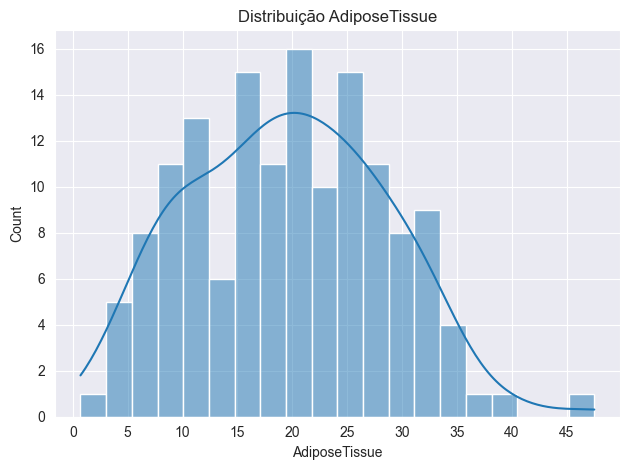

In [ ]:
# Visualizando a Distribuição de AdiposeTissue

# Estilo sns
sns.set_style('darkgrid')

# Alterando o número de passos
plt.xticks(np.arange(0, 55, 5))

#Adicionando título
plt.title('Distribuição AdiposeTissue')

# Visualização
sns.histplot(data= df_body_fat, x= 'AdiposeTissue', bins= 20, kde= True)

# Ajustando layout
plt.tight_layout()

<span style='color:#40E0D0'> Utilizando Percentis, quantidade de acordo com as porcentagens:

In [ ]:
# Usando isso como base podemos tirar alguns insights ()
df_body_fat['AdiposeTissue'].describe(percentiles=(np.linspace(0, 1, 11)))

count    146.000000
mean      19.539726
std        8.909472
min        0.700000
0%         0.700000
10%        7.900000
20%       10.800000
30%       14.800000
40%       17.000000
50%       20.100000
60%       22.100000
70%       24.850000
80%       27.200000
90%       31.450000
100%      47.500000
max       47.500000
Name: AdiposeTissue, dtype: float64

<span style='color:green'> Interpretação  </span> | Até 70% dos avaliados estão abaixo do AdiposeTissue muito alta.

Com isso podemos conhecer valores como:

- Gordura essencial: 2 a 5%;
- Baixo (atletas): 6 a 15%;
- Normal: 16 a 20%;
- Alto: 21 a 24%;
- Muito alto (obesidade): Acima de 25%.

Vendo a Distribuição dentro dessas classificações:

In [ ]:
# Atendendo aos valores de percentual de gordura para cada valor

# baixa Percentual de gordura
baixa_gord = df_body_fat.loc[(df_body_fat['AdiposeTissue'] < 15) & (df_body_fat['AdiposeTissue'] > 6), 'AdiposeTissue']

# normal Percentual de gordura
normal_gord = df_body_fat.loc[(df_body_fat['AdiposeTissue'] < 20) & (df_body_fat['AdiposeTissue'] > 16), 'AdiposeTissue']

# alto Percentual de gordura
alta_gord = df_body_fat.loc[(df_body_fat['AdiposeTissue'] < 24) & (df_body_fat['AdiposeTissue'] > 21), 'AdiposeTissue']

# muito alto Percentual de gordura
obesidade_gord = df_body_fat.loc[df_body_fat['AdiposeTissue'] > 25,  'AdiposeTissue']

In [ ]:
# Fazendo lista dos percuntais
lista_percentuais = ['baixa_gord', 'normal_gord', 'alta_gord', 'obesidade_gord']

# Criando df dos percentuais
percentuais = pd.DataFrame({'baixa_gord': baixa_gord, 'normal_gord': normal_gord, 'alta_gord': alta_gord, 'obesidade_gord': obesidade_gord})

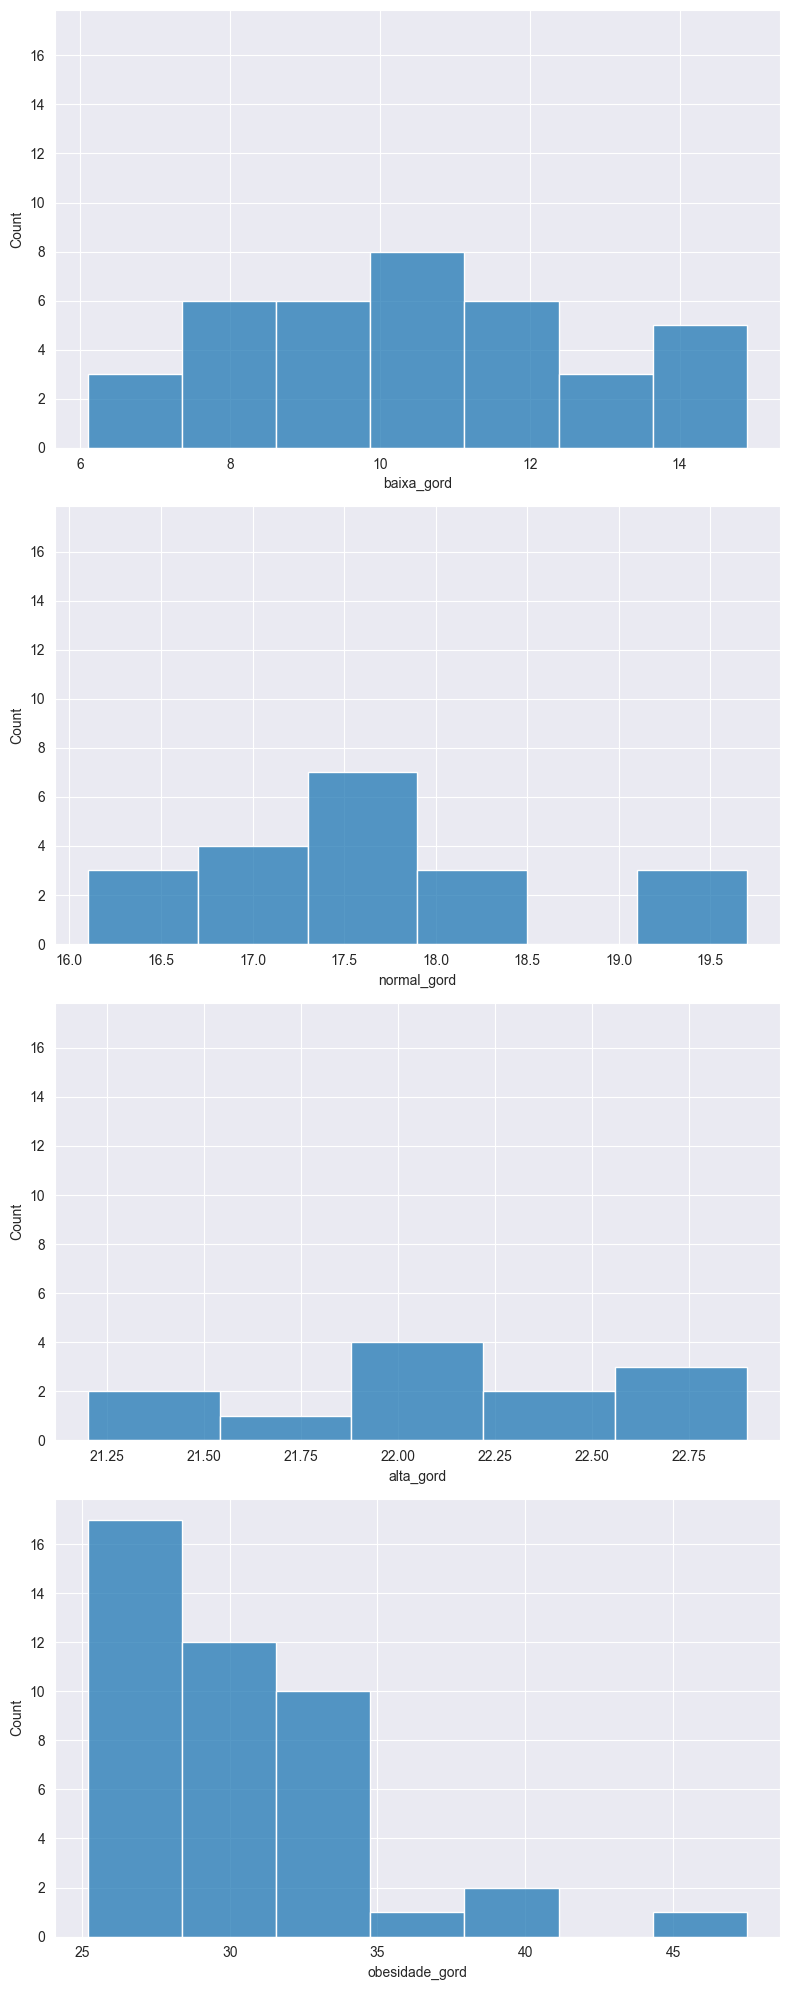

In [ ]:
# Estabelecendo linhas, colunas, compartilhando valor de y e tamanho da figura
fig, axes = plt.subplots(4, 1, sharey=True, figsize=(8, 20))

# Visualização de distribuição
for i in range(4):
    sns.histplot(data= percentuais, x=lista_percentuais[i], ax= axes[i])

# Ajustando o Layout
plt.tight_layout()

<span style='color:green'> Interpretação  </span> | Com a variável que indica **AdiposeTissue 'muito altos'**, encontramos uma maior quantidade dos valores em torno de 25 até cerca de 35. Valores acima disto, são vistos em menor quantidade. As outras porcentagens encontram-se mais distribuidas.

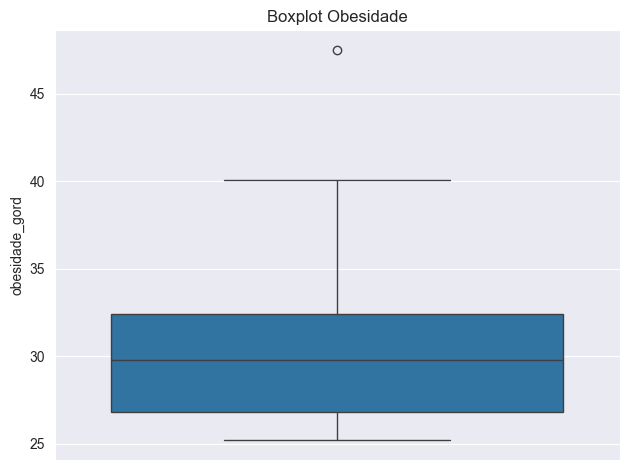

In [ ]:
# Título boxplot
plt.title('Boxplot Obesidade')

# Visualização do dado
sns.boxplot(data= percentuais['obesidade_gord'])

# Ajustando layout
plt.tight_layout()

Como podemos visualizar, temos o valor limíterofe para outliers em 40. Além disso, nestes valores, entre 75% a 25% dos valores estão encontrados um pouco acima de 25% e um pouco abaixo de 35%.

#### <span style='color:#40E0D0'> Density:

<span style='color:green'> Interpretação  </span> | Densidade corporal é descrita como a quantidade de massa presente em relação ao volume total do corpo humano

Distribuição Density

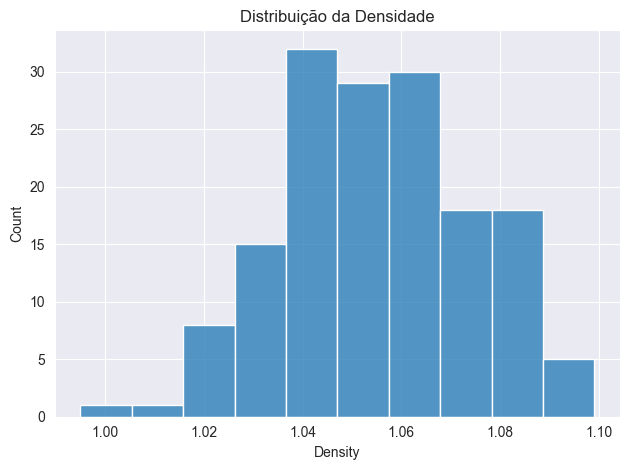

In [ ]:
# Atribuindo título
plt.title('Distribuição da Densidade')

# Visualização
sns.histplot(data= df_body_fat, x= 'Density')

# Ajustando layout
plt.tight_layout()

De acordo com o exposto, temos um certa concentração em valores em torno de 1.04 a 1.08. Apartir disso, temos valores que fogem muito disto? Vamos conferir outliers pelo boxplot.

<span style='color:#40E0D0'> Olhando seu boxplot, valores outliers?

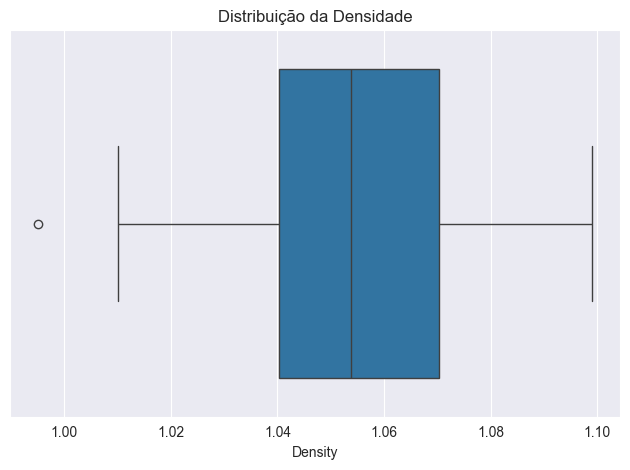

In [ ]:
# Atribuindo título
plt.title('Distribuição da Densidade')

# Visualização
sns.boxplot(data= df_body_fat, x= 'Density')

# Ajustando layout
plt.tight_layout()

<span style='color:green'> Interpretação </span> | Podemo ver esta presença de valores outliers, confirmando nossa suspeita pelo histplot acima. Como visto a maior quantidade dos valores estão presentes em torno de 1.04 e algo em torno de 1.07.

<span style='color:#40E0D0'> Dispersão com BodyFat:

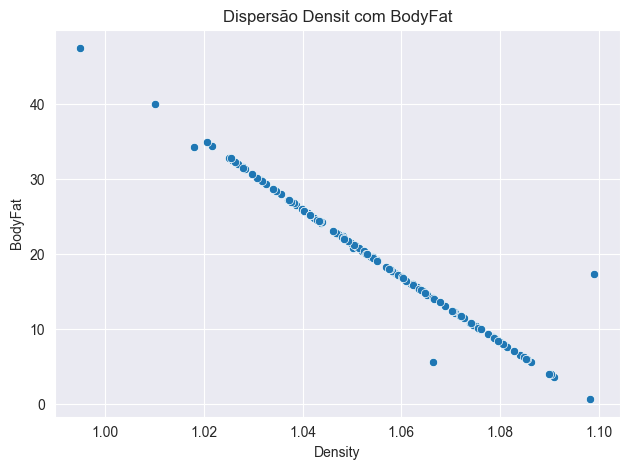

In [ ]:
# Adicionando Título
plt.title('Dispersão Densit com BodyFat')

# Visualizando
sns.scatterplot(data= df_body_fat, x= 'Density', y= 'BodyFat')

# Ajustando layout
plt.tight_layout()

<span style='color:green'> Interpretação </span> | A leitura fica clara da visível correlação presente. Quanto maior o nível de gordura corporal, menor será a densidade. A partir disso, é possível que esta seja outra variável independente com alto coeficiente para contribuir com a previsão do nosso modelo.

#### <span style='color:#40E0D0'> Idades:

Olhando a diversidade de idades

In [ ]:
# Olhando a Diversidade de idades:
df_body_fat['Age'].value_counts()

Age
40.0    10
49.0     9
43.0     8
41.0     7
47.0     7
35.0     6
44.0     6
55.0     6
42.0     5
27.0     5
48.0     4
46.0     4
67.0     4
57.0     4
39.0     4
56.0     4
26.0     4
24.0     4
32.0     3
51.0     3
72.0     3
61.0     3
65.0     3
50.0     2
64.0     2
36.0     2
45.0     2
28.0     2
62.0     2
69.0     2
22.0     2
34.0     2
31.0     2
54.0     2
37.0     2
58.0     2
29.0     2
81.0     1
53.0     1
60.0     1
25.0     1
30.0     1
52.0     1
63.0     1
74.0     1
Name: count, dtype: int64

In [ ]:
# Valores não únicos das idades
print(f"Temos: {df_body_fat['Age'].nunique()} diferentes idades")

Temos: 45 diferentes idades


Visualizando Distribuição:

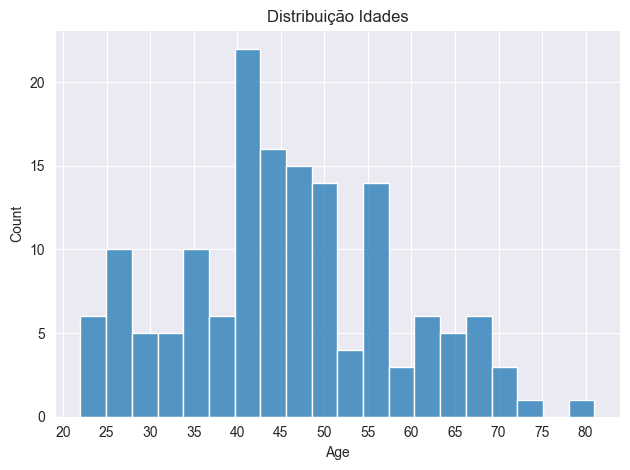

In [ ]:
# Alterando o número de passos
plt.xticks(np.arange(20, 85, 5))

# Adicionando título
plt.title('Distribuição Idades')

# Visualização da distribuição das idades
sns.histplot(data= df_body_fat, x= 'Age', bins= 20)

# Ajustando o layout
plt.tight_layout()

<span style='color:#40E0D0'> Olhando um pouco relação para idade e BodyFat

In [ ]:
# Criando df com a média de BodyFat a partir dos valores de agrupados de idade
media_bodyfat_idade = df_body_fat.groupby('Age')['BodyFat'].mean().reset_index() #reset_index mantem idade como uma coluna

# Espiando a media de percentual de gordura por idade
media_bodyfat_idade.head()

,Age,BodyFat
0,22.0,15.70
1,24.0,20.75
2,25.0,12.40
3,26.0,16.15
4,27.0,12.62


Conferindo no gráfico:

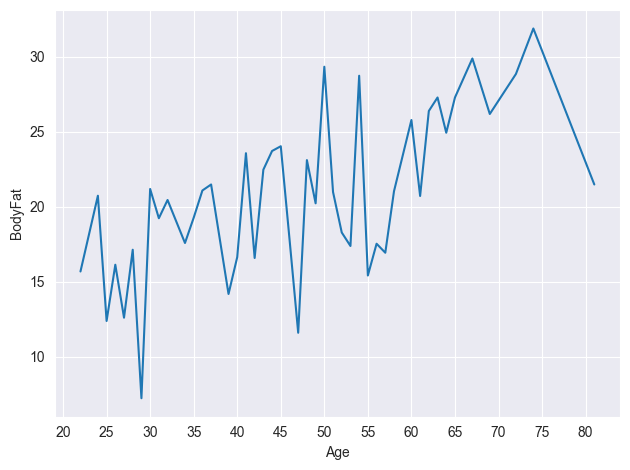

In [ ]:
# Adicionando Título
plt.title('BodyFat ao longo das Idades')

# Alterando o número de passos
plt.xticks(np.arange(20, 85, 5))

# Visualização em linha
sns.lineplot(media_bodyfat_idade, x='Age', y='BodyFat')

# Ajustando layout
plt.tight_layout()

Por volta de 80 anos temos esta queda, pois temos apenas 1 único paciente com cerca de 81 anos. Com isso, é normal a queda tendo em vista um único dado sobre, sendo sua bodyfat em torno de 20 a 25.

<span style='color:green'> Interpretação  </span> | Podemos ver que ao longo das idades, há um aumento em Percentual de Gordura corporal e, segundo Pollock & Wilmore,1993, é uma tendência comum para homens e mulheres.

#### <span style='color:#40E0D0'> Peso & Altura:

Dados valiosos para o IMC.

Visualizando Distribuição:

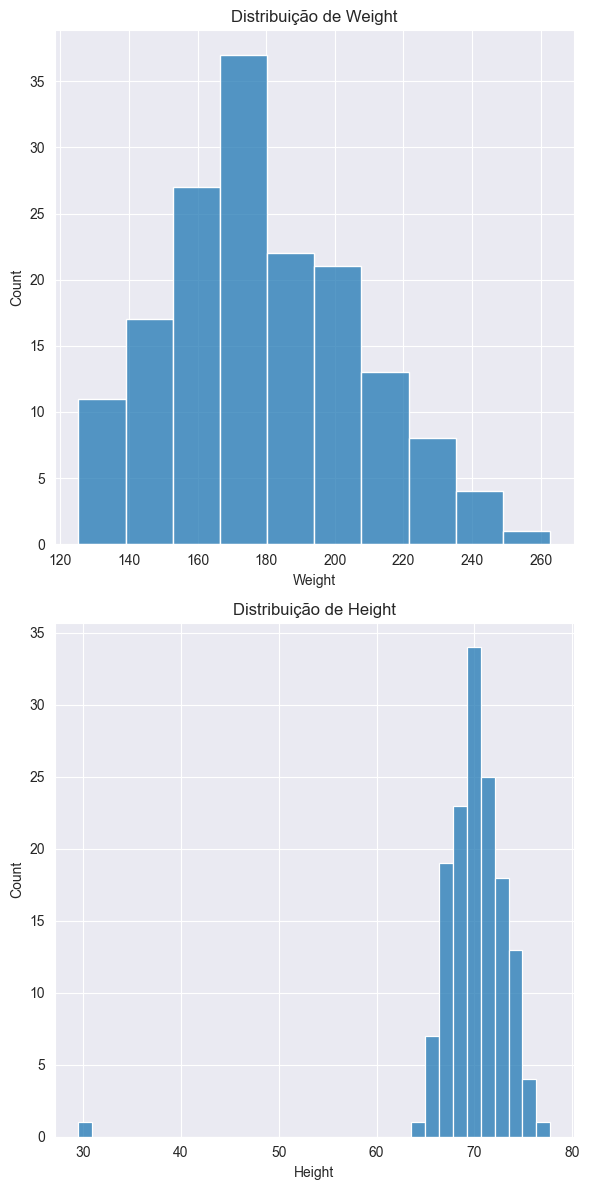

In [ ]:
# Lista com o que será nosso x e título no gráfico
peso_e_altura = ['Weight', 'Height']

# Estabelecendo linhas, colunas e tamanho da figura
fig, axes = plt.subplots(2, 1, figsize= (6, 12))


# Visualizando a distribuição da altura e peso
for i in range(2):
    sns.histplot(data= df_body_fat, x= peso_e_altura[i], ax= axes[i])
    axes[i].set_title(f'Distribuição de {peso_e_altura[i]}') # Adicionando título a cada axes

# Ajustando o layout
plt.tight_layout()

Tais valores, muito voltados ao IMC, porém, não se deve deixar ignorado sua visualização dos dados.

<span style='color:green'> Interpretação  </span> | Estranho valor Outlier que não representa a realidade, ainda mais conhecendo as idades. Vamos encontrar esta linha:

In [ ]:
# Buscando Pessoa com essa altura menor que 40 polegadas
df_body_fat.loc[df_body_fat['Height'] < 40, :]

,AdiposeTissue,Density,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,BodyFat
32,32.9,1.025,44.0,205.0,29.5,36.6,106.0,NaN,115.5,70.6,42.5,23.7,33.6,28.7,17.4,32.9


A altura de 29.5 polegadas? É algo em torno de 0.7 metros com 44 anos....

#### <span style='color:#40E0D0'> Medidas Gerais:

In [ ]:
# Separando os nomes das colunas
df_body_fat.columns

# Atribuindo a variável medidas
medidas = ['Neck', 'Chest','Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm','Wrist']

Visualizando Distribuição:

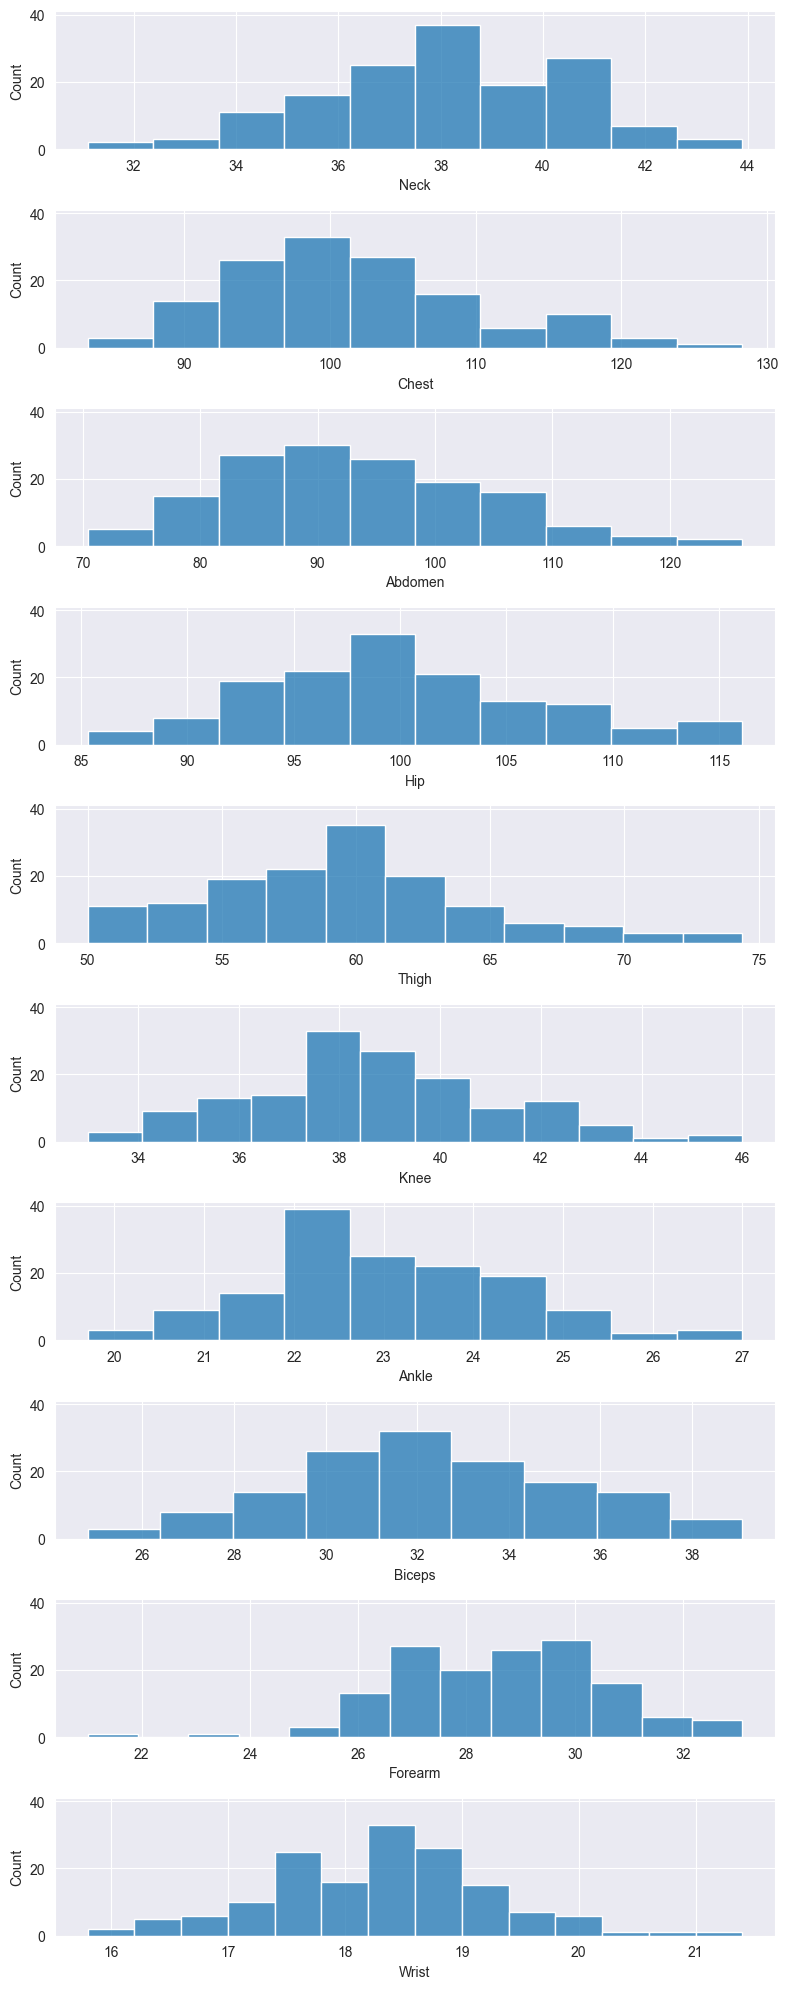

In [ ]:
# Estabelecendo linhas, colunas, compartilhando valor de y e tamanho da figura
fig, axes = plt.subplots(10, 1, sharey= True, figsize=(8, 20))

# Plotando os gráficos
for i in range(10):
    sns.histplot(data= df_body_fat, x= medidas[i], ax= axes[i])

# Ajustando layout
fig.tight_layout()

<span style='color:green'> Interpretação </span> | Podemos visualizar valores mais extremos, provável Outliers.

Conferindo isto:

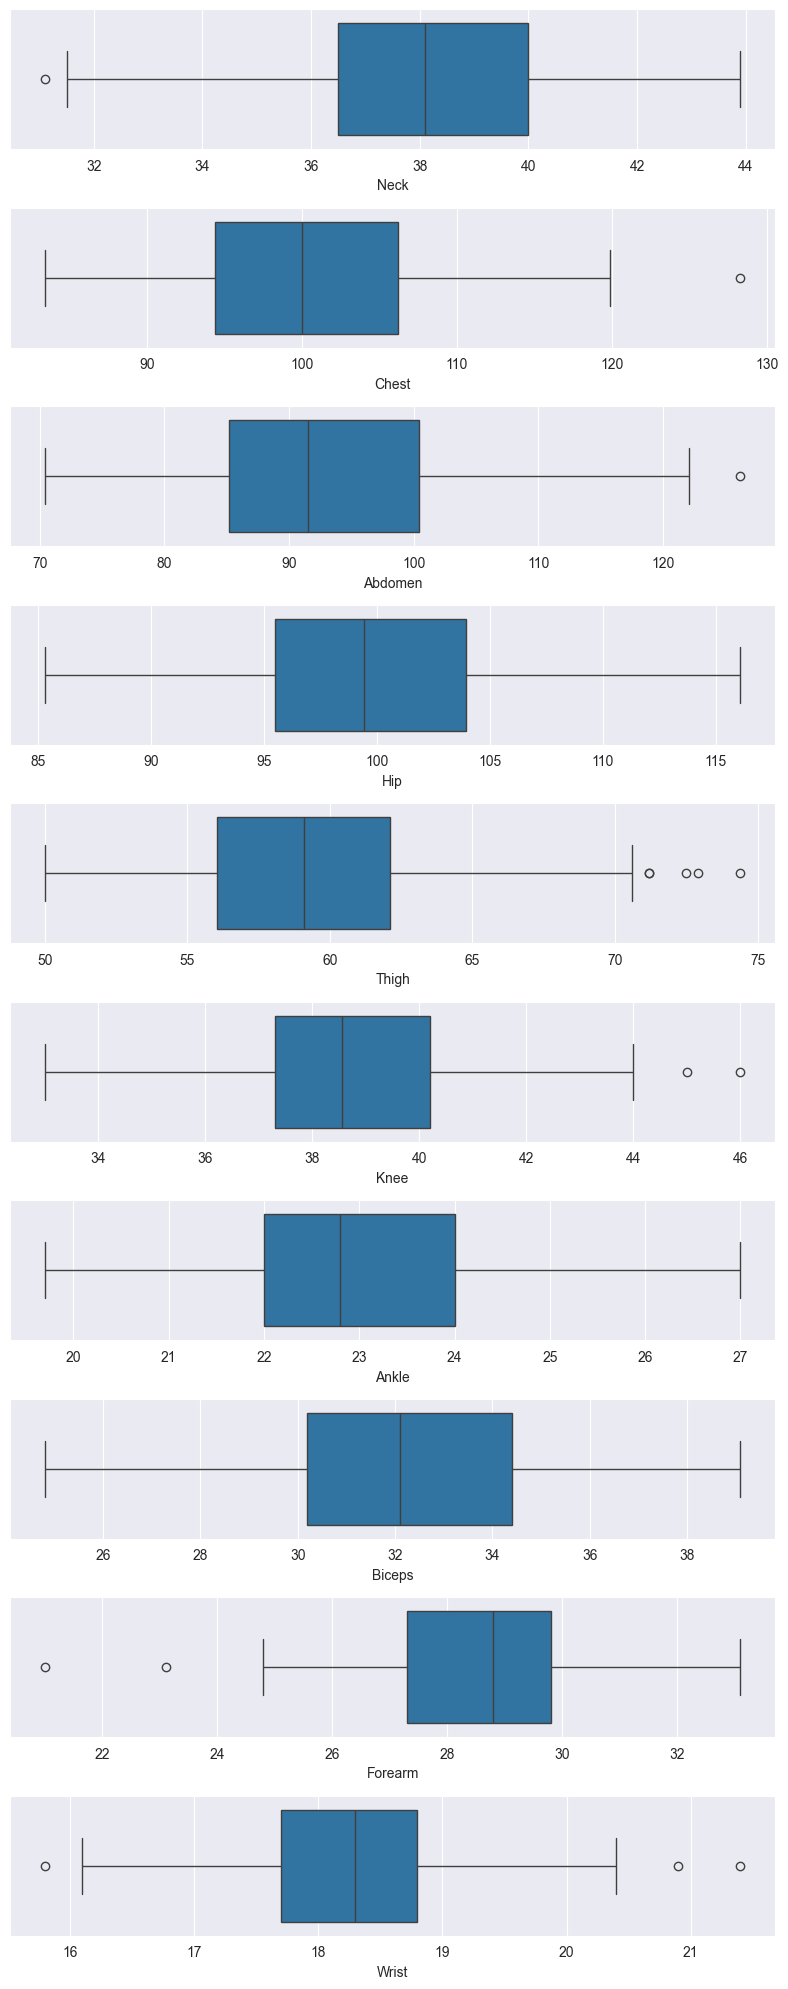

In [ ]:
# Estabelecendo linhas, colunas, compartilhando valor de y e tamanho da figura
fig, axes = plt.subplots(10, 1, sharey= True, figsize=(8, 20))

# Plotando os gráficos
for i in range(10):
    sns.boxplot(data= df_body_fat, x= medidas[i], ax= axes[i])

# Ajustando layout
fig.tight_layout()

<span style='color:green'> Interpretação </span> | Como podemos ver a presença de Outliers é trazida a tona com boxplot. Vamos tratá-las posteriormente.

<span style='color:green'> Interpretação </span> | Tais medidas vistas de forma isolada não produzem tanto valor para nossa variável target. Entretanto, podemos buscar visualizar sua correlação.

In [ ]:
# Criando df para realizar a correlação, utilizando as medidas + a variável BodyFat
df_para_corr = df_body_fat[medidas + ['BodyFat']]

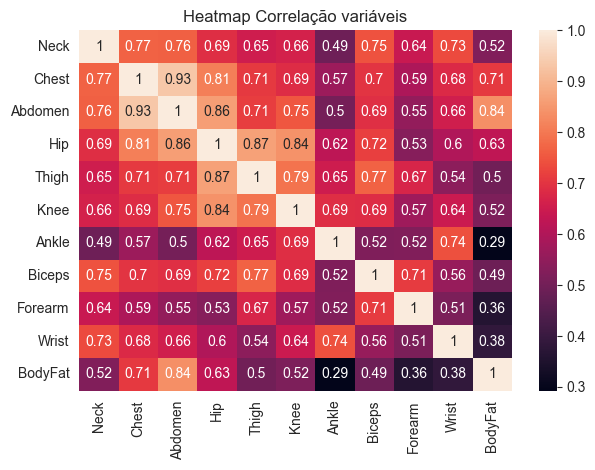

In [ ]:
# Atribuindo à variável a correlação entre variáveis independentes
corr = df_para_corr.corr()

# Título ao heatmap
plt.title('Heatmap Correlação variáveis')

# Plotando o heatmap com os valores de sua correlação
sns.heatmap(data=corr, annot=True)

# Ajustando layout
plt.tight_layout()

<span style='color:red'> Insight </span> | É sabido que problemática da multicolinearidade se da quando temos uma alta correlação entre as variáveis independentes, podendo trazer prejuizo ao modelo, interferir nas estimativas dos coeficientes e dificultar a interpretação.

Por conta disso podemos considerar:
- Por se partes do corpo naturalmente vão estar relacionadas
- Verificar o uso de modelos de regressão Lasso e Ridge
- Tentar o uso de Feature Engineering

#### <span style='color:#40E0D0'> Reconhecendo Relação com Variável Target:



Conhecendo as relações:

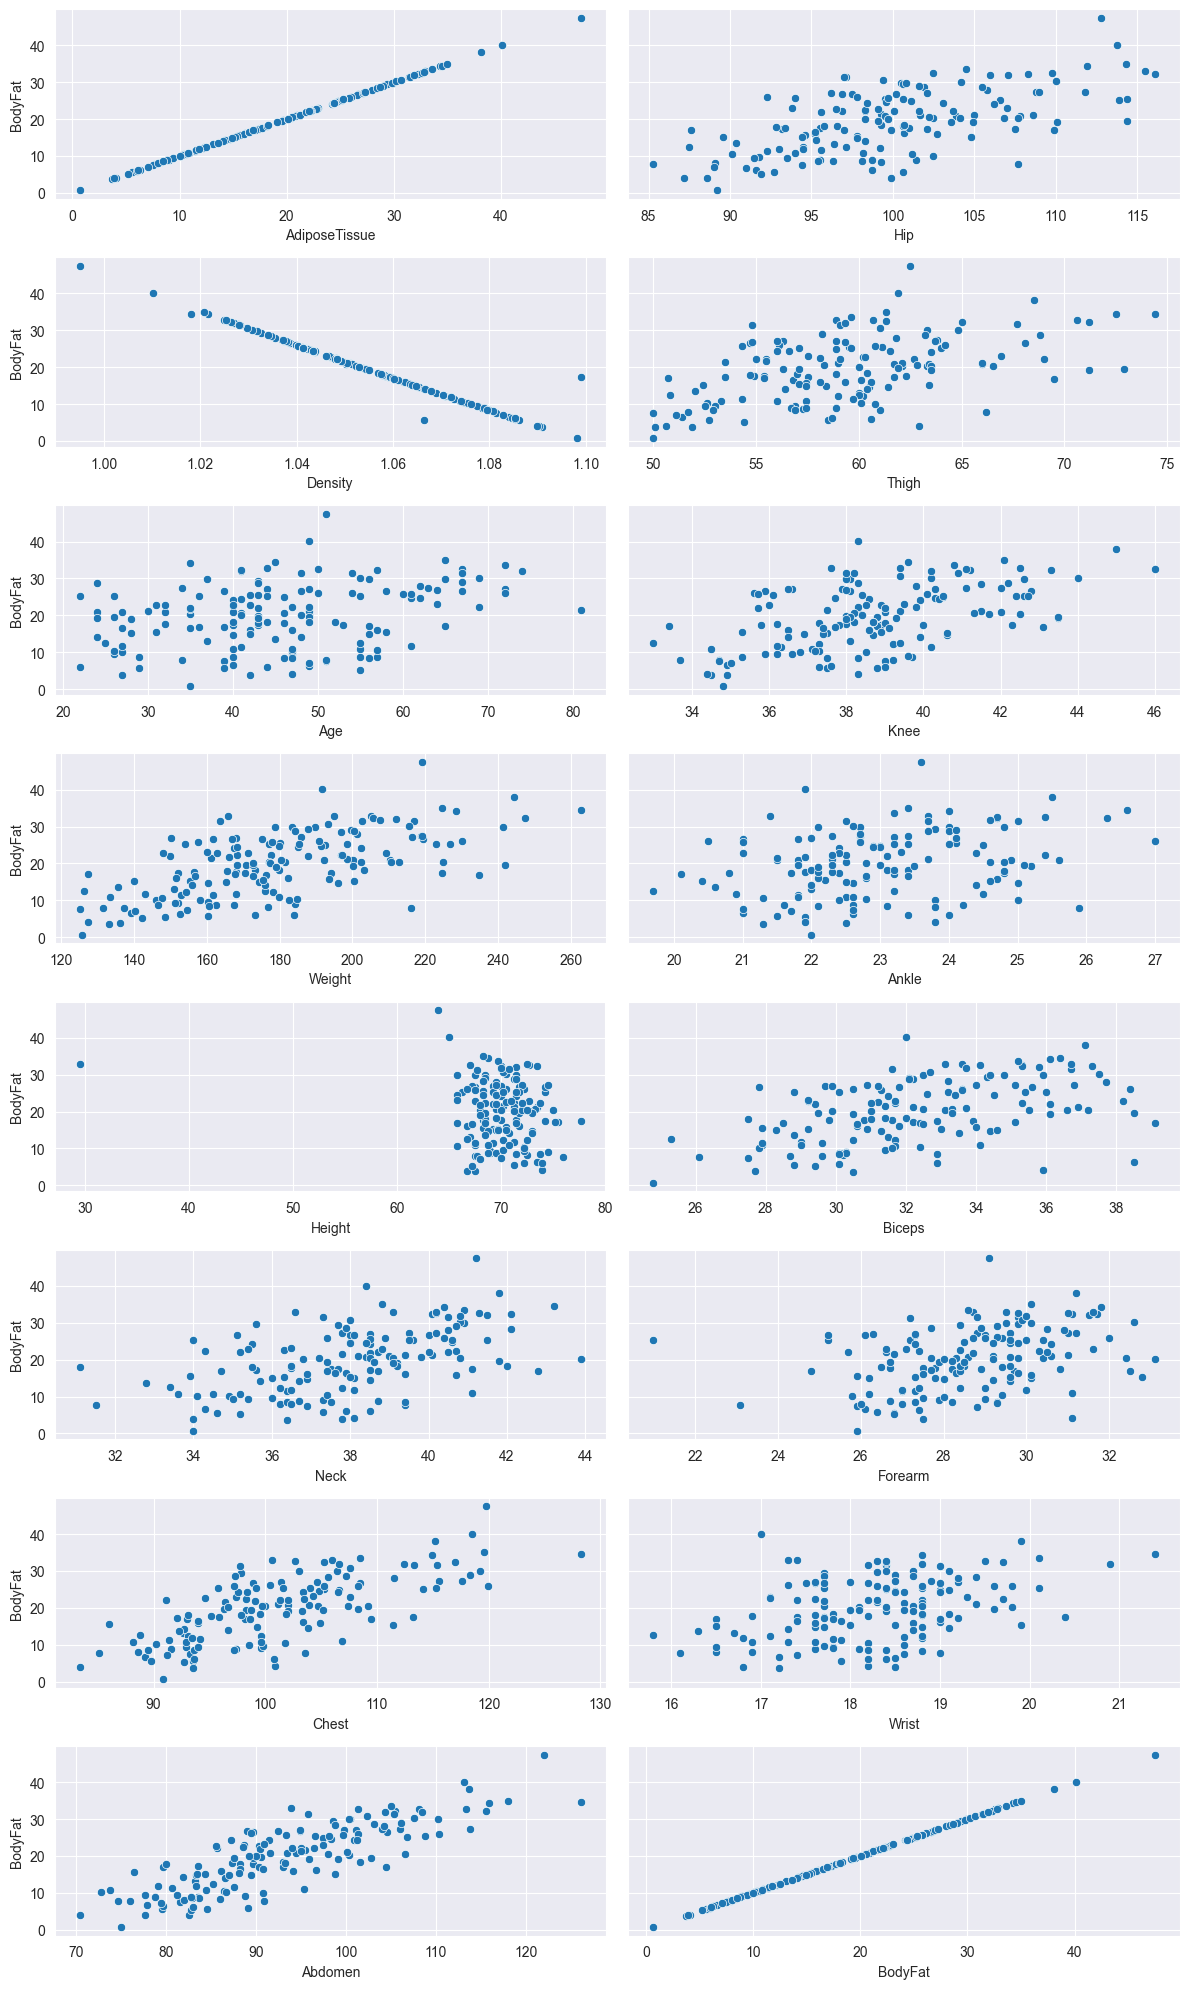

In [ ]:
# Estabelecendo linhas, colunas, compartilhando valor de y e tamanho da figura
fig, axes = plt.subplots(8, 2, sharey=True, figsize=(12, 20))

# Visualização dos gráficos de dispersão
for r in range(8):
    for c in range(2):
        x_column = df_body_fat.columns[c * 8 + r]  # Calcula o índice da coluna
        sns.scatterplot(data=df_body_fat, x=x_column, y='BodyFat', ax=axes[r, c])

# Ajustando layout
plt.tight_layout()

<span style='color:green'> Interpretação </span> | Podemos observar uma visível correlação entre a variável target e algumas preditoras como Abdomen, Density, AdiposeTissue, Chest, por exemplo.

### <span style='color:#40E0D0'> Variáveis Preditoras e Variável Target

- X = variáveis preditoras
- y = variável target

Este é nosso df oriundo do 'train.csv'

In [ ]:
df_body_fat.head()

,AdiposeTissue,Density,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,BodyFat
0,29.9,1.0316,65.0,189.75,65.75,40.8,106.4,100.5,100.5,NaN,38.1,24.0,35.9,NaN,19.1,29.9
1,27.0,1.0378,72.0,168.00,69.25,38.5,101.4,99.8,96.2,56.3,36.6,22.0,29.7,26.3,18.0,27.0
2,8.8,1.0790,29.0,160.75,69.00,36.7,97.4,83.5,98.7,58.9,35.3,22.6,30.1,26.7,17.6,8.8
3,34.3,1.0180,35.0,228.25,NaN,40.4,114.9,115.9,111.9,74.4,NaN,24.0,36.1,31.8,18.8,34.3
4,20.3,1.0525,35.0,224.75,72.25,43.9,NaN,100.4,106.8,63.3,41.7,24.6,37.2,33.1,19.8,20.3


- <span style='color:#40E0D0'> Base Treino:

Variáveis Preditoras Treino:

In [ ]:
# Atribuindo e olhando nossas Variáveis Preditoras
X_train = df_body_fat.drop('BodyFat', axis= 1)
X_train.shape

(175, 15)

Variável Target Treino:

In [ ]:
# Atribuindo e olhando nossa Variável Target
y_train = df_body_fat['BodyFat']
y_train.shape

(175,)

- <span style='color:#40E0D0'> Base Teste:

Variáveis Preditoras Teste:

In [ ]:
# Lendo a base de teste
df_body_fat_test = pd.read_csv('./dados/test.csv')

# Atribuindo e olhando nossas Variáveis Preditoras
X_test = df_body_fat_test.drop('BodyFat', axis= 1)
X_test.shape

(76, 15)

Variável Target Teste:

In [ ]:
# Atribuindo e olhando nossa Variável Target
y_test = df_body_fat_test['BodyFat']
y_test.shape

(76,)

### <span style='color:#40E0D0'> Modificando Valores Outliers:

Valores assimetricos: sua resolução deve auxiliar em nosso modelo

In [ ]:
# Adicionando função lambda para identificar a assimetria das colunas de Xtrain
assimetria_colunas = X_train.apply(lambda x: x.skew())

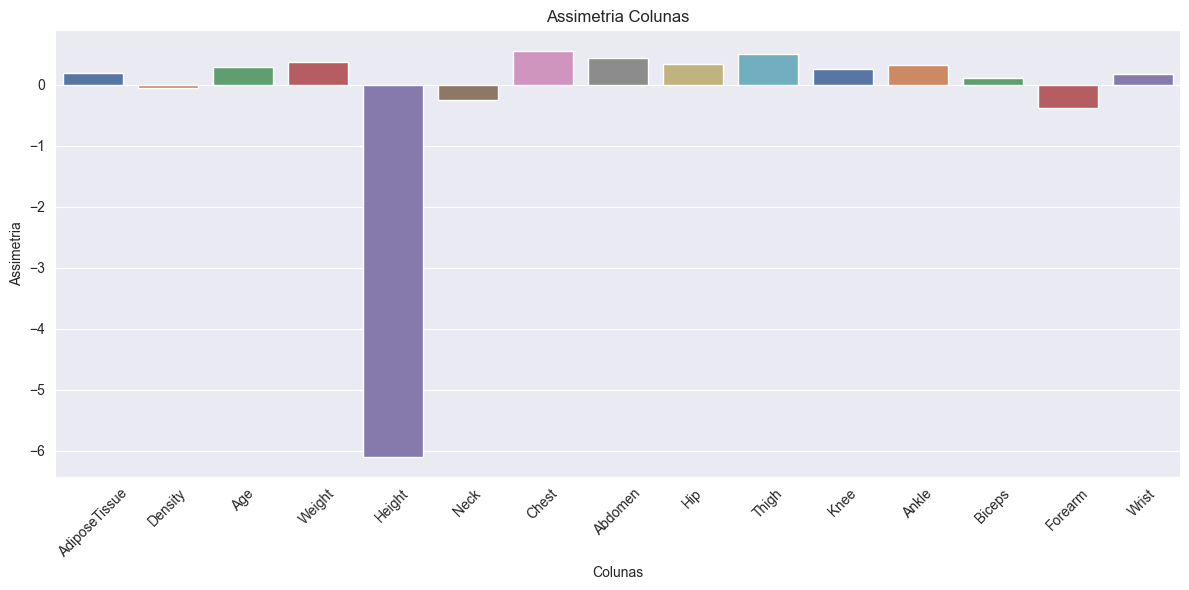

In [ ]:
# Mudando o tamanho da figura
plt.figure(figsize=(12, 6))

# Visualização da assimetria
sns.barplot(x=assimetria_colunas.index, y=assimetria_colunas, hue=assimetria_colunas.index, palette= 'deep', legend= False)

# Título
plt.title('Assimetria Colunas')

# Colando nomes em xlabel e ylabel
plt.xlabel('Colunas')
plt.ylabel('Assimetria')

# Deixandos os nomes em posição
plt.xticks(rotation=45)

# Ajustando layout
plt.tight_layout()

<span style='color:green'> Interpretação </span> | Conseguimos visualizar a presença de assimetria enorme em altura. Contudo, não vamos esquecer dos outliers vistos em medidas gerais.

Não poderiamos esquecer da altura de 29,5 pol
- height (como altura próxima 29,5 pol)


#### <span style='color:#40E0D0'> Altura </span>:
<span style='color:green'> Interpretação </span> |  trataremos seu valor faltante com uso de medida de tendência central (Mediana). Medidas como a média em situações como este de outliers podem alterar o valor para mais ou para menos, por isso, optar pela mediana.

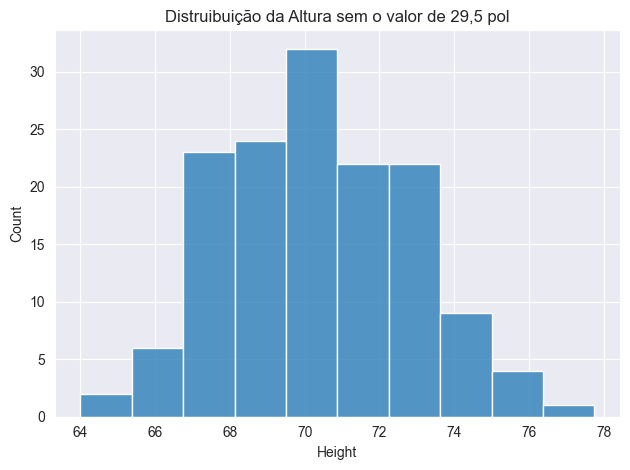

In [ ]:
# Título
plt.title('Distruibuição da Altura sem o valor de 29,5 pol')

# Visualização da distribuição
sns.histplot(data= X_train[X_train['Height'] > 40], x= 'Height')

# Ajustando layout
plt.tight_layout()

Boxplot com a altura de 29,5 pol:

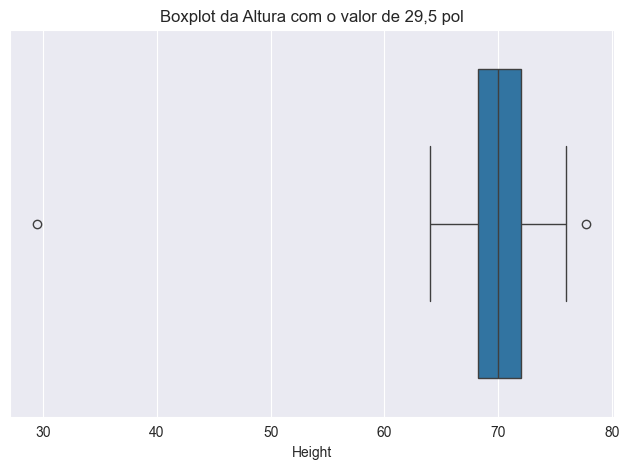

In [ ]:
# Título
plt.title('Boxplot da Altura com o valor de 29,5 pol')

# Visualização do Boxplot
sns.boxplot(data= X_train, x= 'Height')

# Ajustando layout
plt.tight_layout()

Boxplot sem a altura de 29,5 pol:

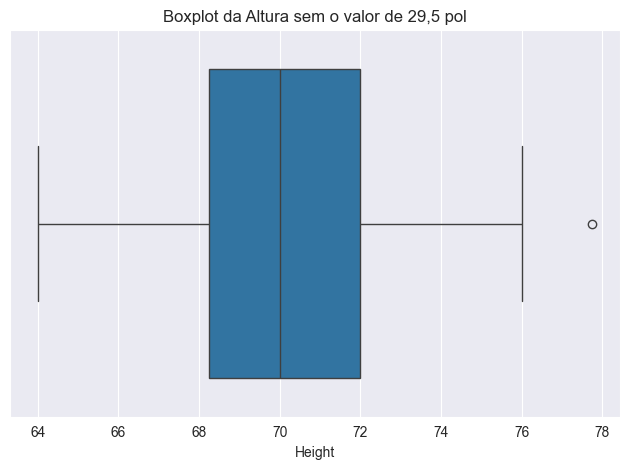

In [ ]:
# Título
plt.title('Boxplot da Altura sem o valor de 29,5 pol')

# Visualização do Boxplot
sns.boxplot(data= X_train[df_body_fat['Height'] > 40], x= 'Height')

# Ajustando layout
plt.tight_layout()

trazendo valores do boxplot

In [ ]:
# Nomenado características do boxplot, utilizaremos para corrigir os outliers
q1 = X_train['Height'].quantile(0.25) # Identificando o 1° quartil
q3 = X_train['Height'].quantile(0.75) # Identificando o 3° quartil

# Intervalo Interquatílico:
intervalo_quartil = q3 - q1

# Valores limítrofes
limit_baixo = q1 - 1.5 * intervalo_quartil # Valor limpitrofe para outliers para baixo
limit_alto = q3 + 1.5 * intervalo_quartil # Valor limpitrofe para outliers para cima

Corrigindo Outliers com Mediana

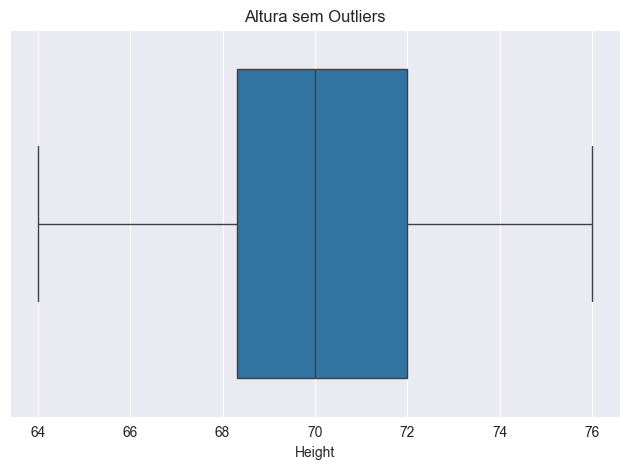

In [ ]:
# Valores de altura que estão acima ou abaixo dos valores limítrofes vão receber a méi
X_train['Height'].loc[(X_train['Height'] < limit_baixo) | (X_train['Height'] > limit_alto)] = X_train['Height'].median()

# Conferindo no gráfico:

# Título
plt.title('Altura sem Outliers')

# Visualização do Boxplot
sns.boxplot(data= X_train, x= 'Height')

# Ajustando layout
plt.tight_layout()

<span style='color:green'> Interpretação </span> | Com isso, lidamos com os valores outliers da altura. Faremos isto com as outras colunas

<span style='color:#40E0D0'> Repetindo o processo acima, vamos olhar a assimetria novamente:

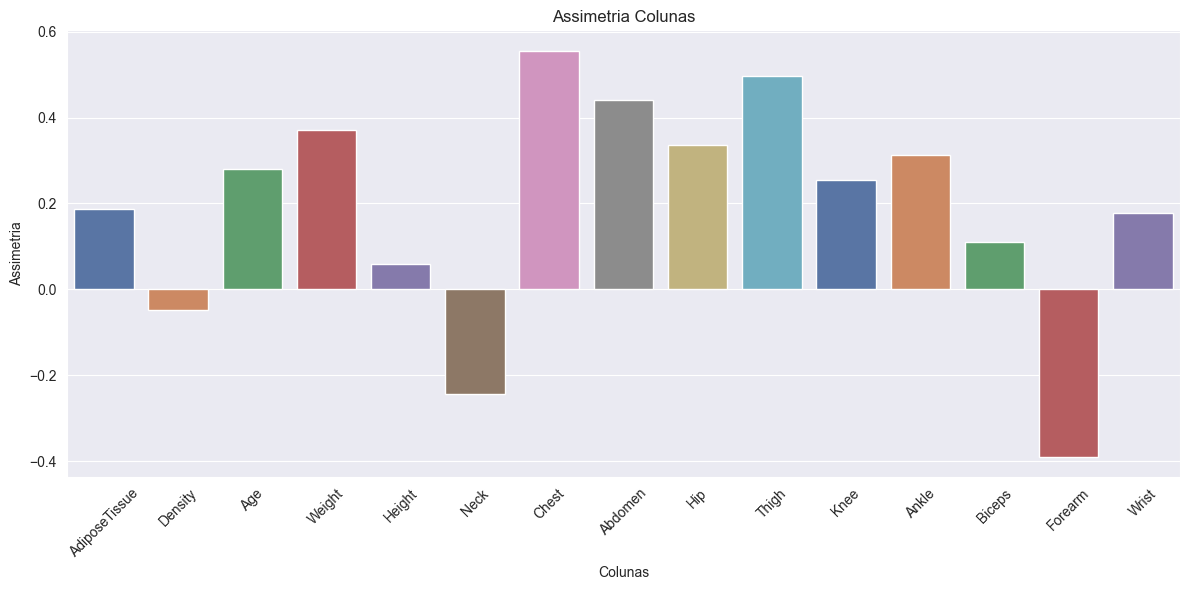

In [ ]:
# Adicionando função lambda para identificar a assimetria das colunas de Xtrain
assimetria_colunas = X_train.apply(lambda x: x.skew())

# Mudando o tamanho da figura
plt.figure(figsize=(12, 6))

# Visualização da assimetria
sns.barplot(x=assimetria_colunas.index, y=assimetria_colunas, hue=assimetria_colunas.index, palette= 'deep', legend= False)

# Título
plt.title('Assimetria Colunas')

# Colando nomes em xlabel e ylabel
plt.xlabel('Colunas')
plt.ylabel('Assimetria')

# Deixandos os nomes em posição
plt.xticks(rotation=45)

# Ajustando layout
plt.tight_layout()

Olharemos para outras variáveis de medidas gerais como:
- chest
- Abdomen
- Thigh
- Forearm
- Hip

#### <span style='color:#40E0D0'> Outras variáveis </span>:

Utilizamos a altura como piloto, vamos de forma mais direta com as outras colunas. Tendo em vista uma 'rotina' faremos uma função para este trabalho.

In [ ]:
# Lista das variáveis assimétricas
var_assimetricas = ['Chest', 'Abdomen', 'Thigh', 'Forearm', 'Hip']

Antes do tratamento:

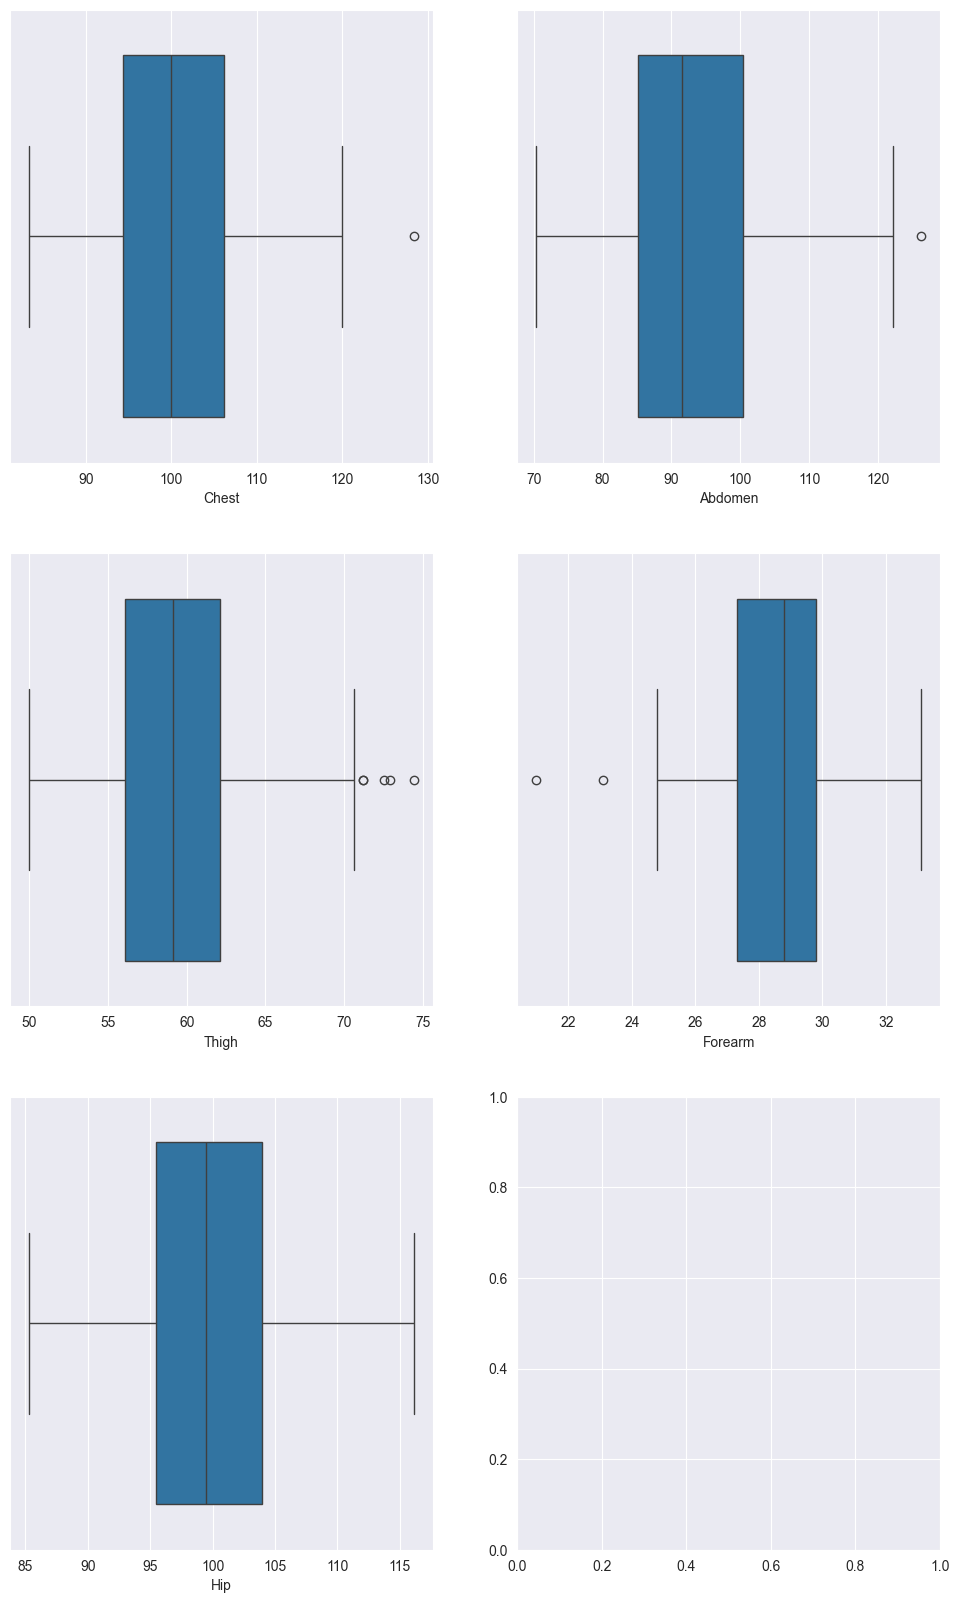

In [ ]:
# Estabelecendo linhas, colunas e tamanho da figura
fig, axes = plt.subplots(3, 2, figsize= (12, 20))

# Visuazliação do gráficos
sns.boxplot(data= X_train, x= 'Chest', ax= axes[0][0])
sns.boxplot(data= X_train, x= 'Abdomen', ax= axes[0][1])
sns.boxplot(data= X_train, x= 'Thigh', ax= axes[1][0])
sns.boxplot(data= X_train, x= 'Forearm', ax= axes[1][1])
sns.boxplot(data= X_train, x= 'Hip', ax= axes[2][0])

plt.show()

Trantando os outliers:

In [ ]:
# Modificando Valores Outliers
def outliers_para_mediana(coluna):
    """
    Vamos substituir valores que ultrapassem os valores limítrofes pelo seu valor da mediano.

    """
    # Identificando os quartis da coluna
    q1 = coluna.quantile(0.25) # Identificando o 1° quartil
    q3 = coluna.quantile(0.75) # Identificando o 3° quartil

    # Intervalo Interquatílico:
    intervalo_quartil = q3 - q1

    # Valores limítrofes
    limit_baixo = q1 - 1.5 * intervalo_quartil # Valor limpitrofe para outliers para baixo
    limit_alto = q3 + 1.5 * intervalo_quartil # Valor limpitrofe para outliers para cima

    coluna.loc[(coluna < limit_baixo) | (coluna > limit_alto)] = coluna.median()

for i in var_assimetricas:
    outliers_para_mediana(X_train[i])

Conferindo boxplot:

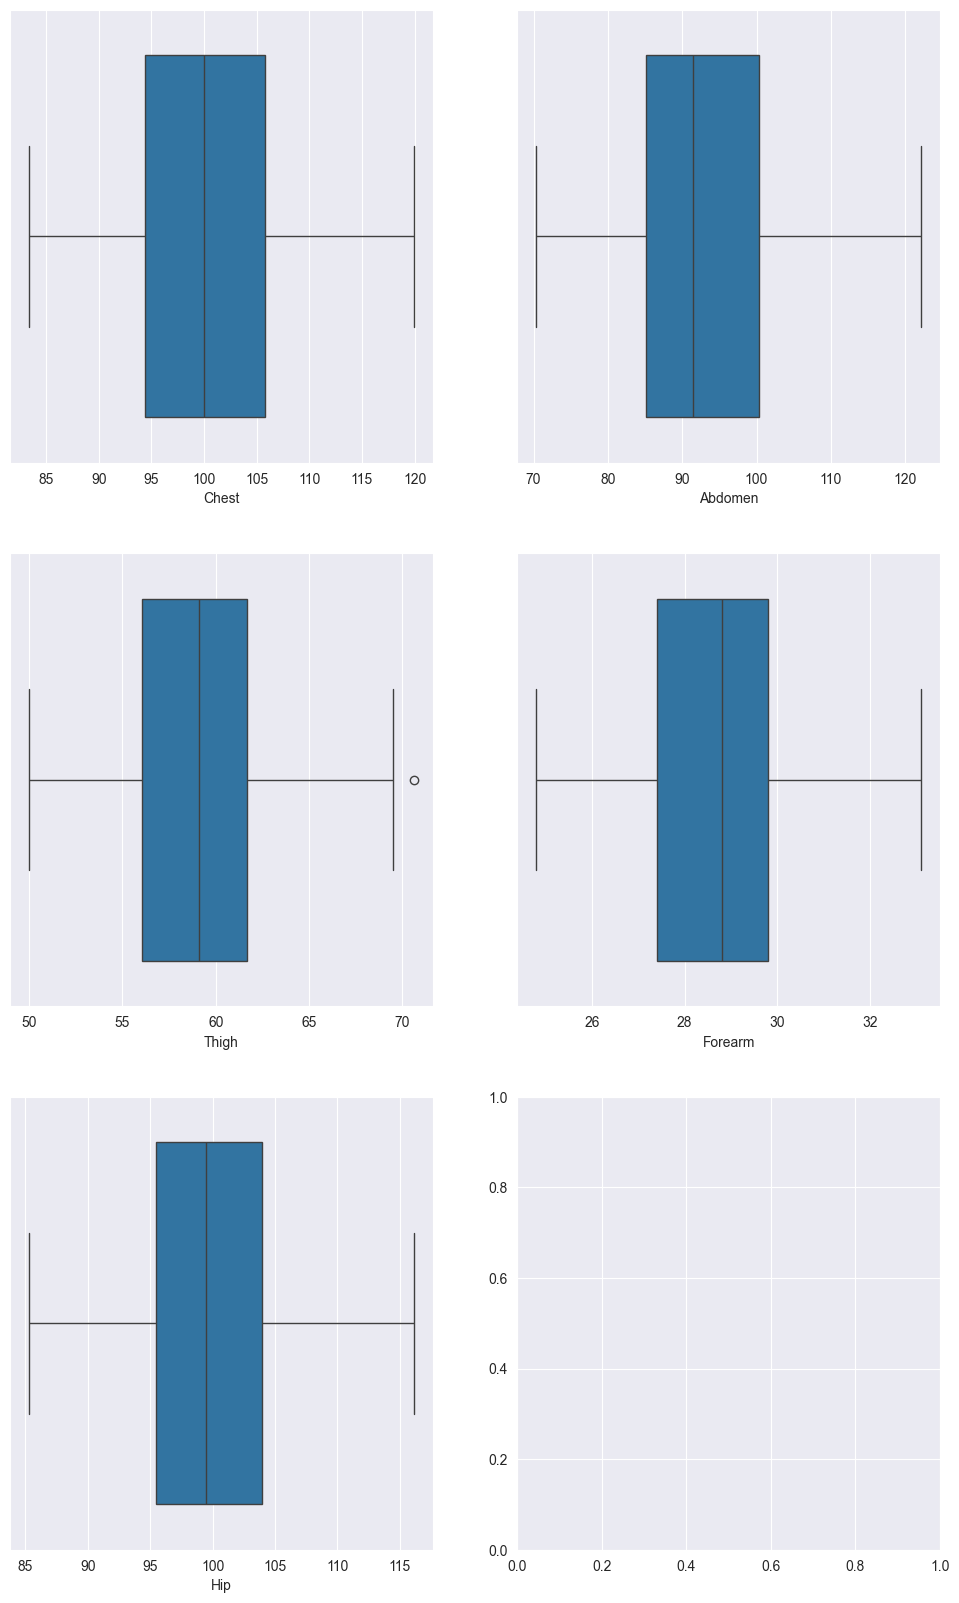

In [ ]:
# Estabelecendo linhas, colunas e tamanho da figura
fig, axes = plt.subplots(3, 2, figsize= (12, 20))

# Visuazliação do gráficos
sns.boxplot(data= X_train, x= 'Chest', ax= axes[0][0])
sns.boxplot(data= X_train, x= 'Abdomen', ax= axes[0][1])
sns.boxplot(data= X_train, x= 'Thigh', ax= axes[1][0])
sns.boxplot(data= X_train, x= 'Forearm', ax= axes[1][1])
sns.boxplot(data= X_train, x= 'Hip', ax= axes[2][0])


plt.show()

<span style='color:green'> Interpretação </span> | Como exposto, temos os valores outliers,de forma geral, tratados.

### <span style='color:#40E0D0'> Tratamento dos Valores Faltantes:

<span style='color:#40E0D0'> Relembrando os valores faltantes:

In [ ]:
X_train.isnull().sum()

AdiposeTissue    29
Density          18
Age              23
Weight           14
Height           29
Neck             25
Chest            36
Abdomen          26
Hip              31
Thigh            28
Knee             27
Ankle            30
Biceps           32
Forearm          28
Wrist            21
dtype: int64

Separando os valores Originais. Caso durante o modelo façamos imputações de valores diferentes tentanto melhorar o desempenho do modelo:

In [ ]:
# Criando copia caso façamos alguma mudança na forma de tratar os valores faltante.
X_train_original = X_train.copy()
X_test_original = X_test.copy()

y_train_original = y_train.copy()
y_test_original = y_test.copy()

Realizar Imputação Simples: Utilizando Mediana

In [ ]:
# Importanto biblioteca para Imputação
from sklearn.impute import SimpleImputer

# Atribuindo à variável o Simple Imputer
imputacao = SimpleImputer(strategy= 'median')

In [ ]:
# Base de Treino

# Imputação de valores faltantes
X_train_imput_mediana = pd.DataFrame(imputacao.fit_transform(X_train))

# Colocando de volta os nomes das colunas, a imputação remove
X_train_imput_mediana.columns = X_train.columns

# Verificando os valores null
X_train_imput_mediana.isnull().sum()

AdiposeTissue    0
Density          0
Age              0
Weight           0
Height           0
Neck             0
Chest            0
Abdomen          0
Hip              0
Thigh            0
Knee             0
Ankle            0
Biceps           0
Forearm          0
Wrist            0
dtype: int64

In [ ]:
# Base de Teste - Também precisa de imputação, entretanto não iremos mudar os valores outliers.
# Imputação de valores faltantes
X_test_imput_mediana = pd.DataFrame(imputacao.transform(X_test))

# Colocando os nomes das colunas, a imputação remove
X_test_imput_mediana.columns = X_test.columns

# Verificando os valores null
X_test_imput_mediana.isnull().sum()

AdiposeTissue    0
Density          0
Age              0
Weight           0
Height           0
Neck             0
Chest            0
Abdomen          0
Hip              0
Thigh            0
Knee             0
Ankle            0
Biceps           0
Forearm          0
Wrist            0
dtype: int64

Todos os valores nulos foram imputados com o uso da mediana. Podemos posteriormente fazer o teste com a média, se for o caso.

### <span style='color:#40E0D0'> Feature Engineering:

Umas das formas de tentarmos minimizar os problemas da multicolinearidade. Com conselho do amigo nutricionista, vamos adicionar 3 colunas:

- **IMC** > Indíce de Massa Corporal, A fórmula é um pouco diferente da nossa usual, pois os valores estão diferentes do padrão brasileiro. Adaptando então teremos, IMC = 703 X Peso em libras / ( Altura em polegadas )^2

- **Razão Abdômen-Peito** (razao_abdomen_peito) > Basicamente avalia a distribuição de gordura, quanto maior o valor, provavelmente maior a concentração de gordura
- **Razão Quadril-Coxa** (razao_quadril_coxa)

<span style='color:#40E0D0'> Antes do Feature Engineering:

In [ ]:
# Olhando os dados novamente
X_train_imput_mediana.head()

,AdiposeTissue,Density,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,29.9,1.0316,65.0,189.75,65.75,40.8,106.4,100.5,100.5,59.1,38.10,24.0,35.9,28.8,19.1
1,27.0,1.0378,72.0,168.00,69.25,38.5,101.4,99.8,96.2,56.3,36.60,22.0,29.7,26.3,18.0
2,8.8,1.0790,29.0,160.75,69.00,36.7,97.4,83.5,98.7,58.9,35.30,22.6,30.1,26.7,17.6
3,34.3,1.0180,35.0,228.25,70.00,40.4,114.9,115.9,111.9,59.1,38.55,24.0,36.1,31.8,18.8
4,20.3,1.0525,35.0,224.75,72.25,43.9,100.0,100.4,106.8,63.3,41.70,24.6,37.2,33.1,19.8


Criando as variáveis:

In [ ]:
# Criando as novas variáveis: Base Treino

# Criando o IMC
X_train_imput_mediana['imc'] = 703 * X_train_imput_mediana['Weight'] / (X_train_imput_mediana['Height']**2)

# Criando Razão Abdomen Peito
X_train_imput_mediana['razao_abdomen_peito'] = X_train_imput_mediana['Abdomen'] / X_train_imput_mediana['Chest']

# Criando Razão Quadril Coxa
X_train_imput_mediana['razao_quadril_coxa'] = X_train_imput_mediana['Hip'] / X_train_imput_mediana['Thigh']

# Olhando novamente o DF
X_train_imput_mediana.head()


,AdiposeTissue,Density,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,imc,razao_abdomen_peito,razao_quadril_coxa
0,29.9,1.0316,65.0,189.75,65.75,40.8,106.4,100.5,100.5,59.1,38.10,24.0,35.9,28.8,19.1,30.856424,0.944549,1.700508
1,27.0,1.0378,72.0,168.00,69.25,38.5,101.4,99.8,96.2,56.3,36.60,22.0,29.7,26.3,18.0,24.627768,0.984221,1.708703
2,8.8,1.0790,29.0,160.75,69.00,36.7,97.4,83.5,98.7,58.9,35.30,22.6,30.1,26.7,17.6,23.736032,0.857290,1.675722
3,34.3,1.0180,35.0,228.25,70.00,40.4,114.9,115.9,111.9,59.1,38.55,24.0,36.1,31.8,18.8,32.746888,1.008703,1.893401
4,20.3,1.0525,35.0,224.75,72.25,43.9,100.0,100.4,106.8,63.3,41.70,24.6,37.2,33.1,19.8,30.267693,1.004000,1.687204


<span style='color:#40E0D0'> Depois do Feature Engineering:

Dropando algumas colunas que não mais vamos precisar, já que temos o IMC e algumas razões sugeridas

In [ ]:
# Dropando as colunas
X_train_imput_mediana = X_train_imput_mediana.drop(['Weight', 'Height', 'Abdomen', 'Chest', 'Hip', 'Thigh'], axis= 1)

# Olhando novamente o head()
X_train_imput_mediana.head()

,AdiposeTissue,Density,Age,Neck,Knee,Ankle,Biceps,Forearm,Wrist,imc,razao_abdomen_peito,razao_quadril_coxa
0,29.9,1.0316,65.0,40.8,38.10,24.0,35.9,28.8,19.1,30.856424,0.944549,1.700508
1,27.0,1.0378,72.0,38.5,36.60,22.0,29.7,26.3,18.0,24.627768,0.984221,1.708703
2,8.8,1.0790,29.0,36.7,35.30,22.6,30.1,26.7,17.6,23.736032,0.857290,1.675722
3,34.3,1.0180,35.0,40.4,38.55,24.0,36.1,31.8,18.8,32.746888,1.008703,1.893401
4,20.3,1.0525,35.0,43.9,41.70,24.6,37.2,33.1,19.8,30.267693,1.004000,1.687204


Fazendo na X_teste_imput_mediana

In [ ]:
# Criando as novas variáveis: Base Treino

# Criando o IMC
X_test_imput_mediana['imc'] = 703 * X_test_imput_mediana['Weight'] / (X_test_imput_mediana['Height']**2)

# Criando Razão Abdomen Peito
X_test_imput_mediana['razao_abdomen_peito'] = X_test_imput_mediana['Abdomen'] / X_test_imput_mediana['Chest']

# Criando Razão Quadril Coxa
X_test_imput_mediana['razao_quadril_coxa'] = X_test_imput_mediana['Hip'] / X_test_imput_mediana['Thigh']

# Dropando as colunas
X_test_imput_mediana = X_test_imput_mediana.drop(['Weight', 'Height', 'Abdomen', 'Chest', 'Hip', 'Thigh'], axis= 1)

# Olhando novamente o head()
X_test_imput_mediana.head()


,AdiposeTissue,Density,Age,Neck,Knee,Ankle,Biceps,Forearm,Wrist,imc,razao_abdomen_peito,razao_quadril_coxa
0,19.2,1.0549,35.0,40.5,41.3,25.6,36.4,28.8,18.3,28.047297,0.884651,1.612654
1,19.2,1.0549,26.0,36.4,38.3,22.9,31.9,27.8,17.7,26.154443,0.862988,1.702911
2,28.0,1.0355,44.0,37.1,40.0,23.6,33.5,27.8,17.4,26.290765,0.972222,1.616954
3,20.1,1.0521,35.0,38.1,37.3,22.4,31.0,28.7,18.3,24.718657,0.910448,1.707612
4,16.7,1.0607,40.0,36.3,36.3,22.1,29.8,28.8,17.3,23.161829,0.892784,1.656530


<span style='color:green'> Interpretação </span> | Com isso, buscamos tentar reduzir a problemática de multicolinearidade entre as variáveis independentes.

### <span style='color:#40E0D0'> Escolhendo o Modelo:

#### <span style='color:#40E0D0'> Feature Scaling </span> |
Utilizaremos a padronização (transformar valores para aproximar os valores a uma distribuição normal com média 0 e desvio padrão 1), pois temos características como ser menos sensível à outliers.

In [ ]:
# Importantdo a Padronização
from sklearn.preprocessing import StandardScaler

In [ ]:

# Atribuindo à variável
escala = StandardScaler()

# Colocando X_train_imput_mediana à escoala de padronização
X_train_imput_escala= escala.fit_transform(X_train_imput_mediana)

# Criando um DF para conferir as escalas
X_train_imput_escala_df = pd.DataFrame(X_train_imput_escala, columns=X_train_imput_mediana.columns)

# Describe
X_train_imput_escala_df.describe()

,AdiposeTissue,Density,Age,Neck,Knee,Ankle,Biceps,Forearm,Wrist,imc,razao_abdomen_peito,razao_quadril_coxa
count,1.750000e+02,1.750000e+02,1.750000e+02,1.750000e+02,1.750000e+02,1.750000e+02,1.750000e+02,1.750000e+02,1.750000e+02,1.750000e+02,1.750000e+02,1.750000e+02
mean,1.116567e-16,3.390304e-15,-2.563029e-16,2.304189e-15,-3.238045e-15,5.798536e-16,3.400455e-16,4.364763e-16,2.070725e-15,-1.583495e-15,3.263421e-15,4.166826e-15
std,1.002869e+00,1.002869e+00,1.002869e+00,1.002869e+00,1.002869e+00,1.002869e+00,1.002869e+00,1.002869e+00,1.002869e+00,1.002869e+00,1.002869e+00,1.002869e+00
min,-2.333724e+00,-3.276477e+00,-1.988295e+00,-3.129023e+00,-2.529002e+00,-2.623865e+00,-2.792395e+00,-2.463571e+00,-2.848940e+00,-2.054589e+00,-3.261996e+00,-2.629975e+00
25%,-5.956870e-01,-7.262250e-01,-4.543423e-01,-6.101775e-01,-5.256937e-01,-5.468669e-01,-6.322846e-01,-6.628188e-01,-6.546556e-01,-6.521392e-01,-5.590374e-01,-5.884525e-01
50%,5.761759e-02,-4.469222e-02,-1.134638e-01,1.953390e-02,-5.825495e-02,-1.474441e-01,-7.363530e-02,2.022520e-02,3.827623e-02,-1.017837e-01,-5.261026e-02,-7.233748e-02
75%,6.431264e-01,6.505812e-01,4.830734e-01,6.042659e-01,4.759607e-01,5.715170e-01,5.222573e-01,5.169845e-01,6.157194e-01,5.369144e-01,5.688112e-01,4.887231e-01
max,3.435079e+00,2.445101e+00,3.039662e+00,2.628338e+00,3.258334e+00,3.207707e+00,2.533395e+00,2.690306e+00,3.618424e+00,3.655779e+00,3.705976e+00,3.139660e+00


A partir daqui podemos visualizar os valores padronizados: com média muito próxima a 0 e desvio padrão em torno de 1.

In [ ]:
# Adicionando a padronização à BASE de Teste
X_test_imput_escala= escala.transform(X_test_imput_mediana)

# Criando um DF para conferir as escalas
X_test_imput_escala_df = pd.DataFrame(X_test_imput_escala, columns=X_test_imput_mediana.columns)

# Describe
X_test_imput_escala_df.describe()

,AdiposeTissue,Density,Age,Neck,Knee,Ankle,Biceps,Forearm,Wrist,imc,razao_abdomen_peito,razao_quadril_coxa
count,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000
mean,-0.114467,0.211461,-0.069733,0.008289,-0.073192,0.181554,0.067987,0.024310,-0.093928,-0.095463,0.059719,-0.052107
std,0.810641,0.789370,0.981814,1.127159,1.034507,1.516038,1.127695,1.038519,1.023919,1.018947,1.010026,0.862001
min,-2.050214,-1.424247,-1.903076,-2.184456,-1.727679,-3.103173,-2.494449,-1.904717,-1.925031,-1.423607,-1.620484,-2.002054
25%,-0.728197,-0.270038,-0.560867,-0.756360,-0.837319,-0.706636,-0.604352,-0.678343,-1.001121,-0.696955,-0.603289,-0.576140
50%,-0.053321,0.015766,-0.113464,-0.002956,-0.058255,-0.147444,-0.073635,0.020225,0.038276,-0.236036,-0.061650,-0.032534
75%,0.356535,0.749513,0.568293,0.390614,0.331277,0.751257,0.568811,0.765364,0.500231,0.256397,0.481161,0.442421
max,1.918919,2.087846,2.272685,5.911833,4.638391,8.719742,4.730749,3.808015,3.618424,6.313882,3.002313,3.311592


#### <span style='color:#40E0D0'> Regressão Linear </span>

In [ ]:
# imporntando bibliotecas
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [ ]:
# Atribuindo a uma variável
regressao_linear = LinearRegression()

# Uso do Cross Validation
valores_xtrain_rl = cross_val_score(estimator= regressao_linear,
                                    X= X_train_imput_escala_df,
                                    y= y_train,
                                    cv= 10,
                                    scoring= 'neg_root_mean_squared_error')

# Olhando os erros em cada split do cross validation
valores_xtrain_rl = valores_xtrain_rl * -1
valores_xtrain_rl

array([1.45472308, 2.72225976, 2.53563601, 1.78873814, 2.50620836,
       4.10074237, 2.38817922, 3.15122547, 2.23652563, 1.45429019])

Média de erro:

In [ ]:
valores_xtrain_rl.mean()

2.4338528225818647

#### <span style='color:#40E0D0'> Árvore de Regressão </span>

<span style='color:green'> Interpretação </span> | Árvore de Regressão é um método que utilizará através dos seus 'ramos de decisão' a fim de chegar ao valor final

In [ ]:
# Importando biblioteca
from sklearn.tree import DecisionTreeRegressor

In [ ]:
# Atribuindo à variável
arvore_regressao = DecisionTreeRegressor()

# Uso do Cross Validation com Árvore de Regressão
valores_xtrain_arvore = cross_val_score(estimator= arvore_regressao,
                                        X= X_train_imput_escala_df,
                                        y= y_train,
                                        cv= 10,
                                        scoring= 'neg_root_mean_squared_error')

# Olhando os erros em cada split do cross validation
valores_xtrain_arvore = valores_xtrain_arvore * -1
valores_xtrain_arvore

array([2.26801431, 4.14547947, 1.79366168, 0.6510675 , 1.63248277,
       4.14317298, 1.56204994, 2.85718908, 2.75211149, 0.75107766])

Media de erro:

In [ ]:
valores_xtrain_arvore.mean()

2.2556306859823576

#### <span style='color:#40E0D0'> Regressão Ridge </span>

<span style='color:green'> Interpretação </span> | Como analisado acima, há variáveis que estão muito correlacionadas ao bodyfat, podendo acabar contendo um alto peso para a predicão. Nesta regressão utilizaremos a soma dos valores dos coeficientes de cada feature ao quadrado para realizarmos a penalização.

Dessa forma penalizando os altos coeficientes de features específicas

In [ ]:
# Importando
from sklearn.linear_model import Ridge

In [ ]:
# Ridge
ridge = Ridge(alpha= 0.1) # parâmetro de regularização (o lambda dos livros é o alpha hiperparametro do skicitlearn), penalidade aos coeficientes

valores_xtrain_ridge = cross_val_score(estimator= ridge,
                                       X= X_train_imput_escala_df,
                                        y= y_train,
                                        cv= 10,
                                        scoring= 'neg_root_mean_squared_error')

# Olhando os erros em cada split do cross validation
valores_xtrain_ridge = valores_xtrain_ridge * -1
valores_xtrain_ridge

array([1.45324163, 2.72041057, 2.53326664, 1.78969356, 2.50647269,
       4.09619848, 2.38757371, 3.15108494, 2.23554786, 1.45658479])

Media de erro:

In [ ]:
valores_xtrain_ridge.mean()

2.4330074863087257

#### <span style='color:#40E0D0'> Regressão Lasso </span>

<span style='color:green'> Interpretação </span> | Como analisado acima, há variáveis que estão muito correlacionadas ao bodyfat, podendo acabar contendo um alto peso para a predicão. Esta regressão utilizará o módulo da soma dos valores absolutos dos coeficientes como peso para penalizar.

A Regressão lasso vamos trazer no intuito de verificar se o processo de 'penalizar' os altos valores dos coeficientes podem auxiliar a encontrar um melhor desempenho no modelo.

In [ ]:
# Importando
from sklearn.linear_model import Lasso

In [ ]:
# Lasso
lasso = Lasso(alpha= 0.1) # parâmetro de regularização (o lambda dos livros é o alpha hiperparametro do skicitlearn), penalidade aos coeficientes

valores_xtrain_lasso = cross_val_score(estimator= lasso,
                                        X= X_train_imput_escala_df,
                                        y= y_train,
                                        cv= 10,
                                        scoring= 'neg_root_mean_squared_error')

# Olhando os erros em cada split do cross validation
valores_xtrain_lasso = valores_xtrain_lasso * -1
valores_xtrain_lasso

array([1.28522107, 2.70466837, 2.56065994, 1.63319134, 2.4963087 ,
       4.06044165, 2.3629731 , 3.12648229, 2.0861078 , 1.31619699])

Media de erro:

In [ ]:
valores_xtrain_lasso.mean()

2.363225123889475

#### <span style='color:#40E0D0'> XGBoost Regressor </span> | Boosting

<span style='color:green'> Interpretação </span> | Utiliza modelos para 'resolução do erro' de forma sequencial ao longo do número de árvores

In [ ]:
# Importando a biblioteca
from xgboost import XGBRegressor

In [ ]:
# Atribuindo à variável xgbr a regressão linear com 15 árvores de regressão
xgbr =  XGBRegressor(objective= 'reg:squarederror', n_estimators= 15, seed= 123)

valores_xgbr = cross_val_score(estimator= xgbr,
                               X= X_train_imput_escala_df,
                                        y= y_train,
                                        cv= 10,
                                        scoring= 'neg_root_mean_squared_error')

# Olhando os erros em cada split do cross validation
valores_xgbr = valores_xgbr * -1
valores_xgbr

array([2.16889452, 3.40151258, 1.17551827, 0.80709912, 0.96888088,
       2.97382467, 1.34759485, 1.82076115, 1.72156216, 0.79832719])

Média erro:

In [ ]:
valores_xgbr.mean()

1.7183975394398054

#### <span style='color:#40E0D0'> Random Forest </span> | Bagging

<span style='color:green'> Interpretação </span> | A Random Forest, irá utilizar árvores de regressão em paralelo e, a partir do valor encontrado pela maioria, teremos o resultado

In [ ]:
# Importando a biblioteca
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# Atribuindo à variável
random_forest = RandomForestRegressor()

# Uso do Cross Validation com Random Forest
valores_xtrain_forest = cross_val_score(estimator= random_forest,
                                        X= X_train_imput_escala_df,
                                        y= y_train,
                                        cv= 10,
                                        scoring= 'neg_root_mean_squared_error')

# Olhando os erros em cada split do cross validation
valores_xtrain_forest = valores_xtrain_forest * -1
valores_xtrain_forest

array([2.33878027, 2.91757375, 0.7370332 , 0.60781549, 1.24755131,
       3.13012618, 1.21478626, 2.44388414, 1.67825215, 0.90297332])

Média de erro:

In [ ]:
valores_xtrain_forest.mean()

1.7218776086023033

### <span style='color:#40E0D0'> Comparação modelos:

In [ ]:
# Criando DataFrame para os comparação dos modelos
modelos = pd.DataFrame({ 'Regressão ': valores_xtrain_rl,
                        'Regressão  Ridge': valores_xtrain_ridge,
                        'Regressão Lasso ': valores_xtrain_lasso,
                        'Arvore de Regressão': valores_xtrain_arvore,
                        'Random Forest': valores_xtrain_forest,
                        'XGBRegressor': valores_xgbr})

# Expondo os modelos
modelos

,Regressão,Regressão Ridge,Regressão Lasso,Arvore de Regressão,Random Forest,XGBRegressor
0,1.454723,1.453242,1.285221,2.268014,2.338780,2.168895
1,2.722260,2.720411,2.704668,4.145479,2.917574,3.401513
2,2.535636,2.533267,2.560660,1.793662,0.737033,1.175518
3,1.788738,1.789694,1.633191,0.651067,0.607815,0.807099
4,2.506208,2.506473,2.496309,1.632483,1.247551,0.968881
5,4.100742,4.096198,4.060442,4.143173,3.130126,2.973825
6,2.388179,2.387574,2.362973,1.562050,1.214786,1.347595
7,3.151225,3.151085,3.126482,2.857189,2.443884,1.820761
8,2.236526,2.235548,2.086108,2.752111,1.678252,1.721562
9,1.454290,1.456585,1.316197,0.751078,0.902973,0.798327


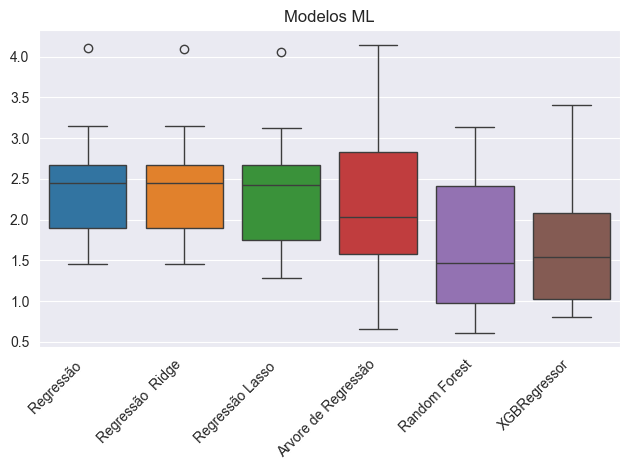

In [ ]:
# Título
plt.title('Modelos ML')

# Visualização
sns.boxplot(data= modelos)

# Ajeitando posição xticks
plt.xticks(rotation= 45, ha= 'right')

# Ajustando layout
plt.tight_layout()

<span style='color:green'> Interpretação </span> | Tendo em vista a menor média de erro exposta e mediana abaixo da exposta pela XGBoost Regressor.A partir disso iremos considerar o modelo de **Random Forest** como **modelo escolhido** e realizar o desempenho do modelo.

### <span style='color:#40E0D0'> Escolhido o Modelo:

<span style='color:#40E0D0'> Realizando o fit em nosso modelo escolhido:

In [ ]:
# Ajustando o modelo
random_forest.fit(X= X_train_imput_escala_df, y= y_train)

RandomForestRegressor()

In [ ]:
# coeficientes de contribuição de cada recurso
random_forest.feature_importances_

array([0.43485976, 0.53447538, 0.0009036 , 0.00365971, 0.003382  ,
       0.00133359, 0.0023771 , 0.00143069, 0.0014942 , 0.01205851,
       0.00171803, 0.00230744])

In [ ]:
# Nomes das features
random_forest.feature_names_in_

array(['AdiposeTissue', 'Density', 'Age', 'Neck', 'Knee', 'Ankle',
       'Biceps', 'Forearm', 'Wrist', 'imc', 'razao_abdomen_peito',
       'razao_quadril_coxa'], dtype=object)

In [ ]:
# Criando dicionário com os dados
data = {coluna: valor for coluna, valor in zip(random_forest.feature_names_in_, random_forest.feature_importances_)}

# Criando o DataFrame
df_coeficientes = pd.DataFrame(data, index= [0])
df_coeficientes

,AdiposeTissue,Density,Age,Neck,Knee,Ankle,Biceps,Forearm,Wrist,imc,razao_abdomen_peito,razao_quadril_coxa
0,0.485884,0.486875,0.001546,0.004626,0.004371,0.000446,0.002464,0.00087,0.001532,0.008337,0.001769,0.001277


<span style='color:red'> Insight </span> | Um valor mais alto indica que o recurso tem uma maior contribuição na tomada de decisões do modelo.
Um valor próximo a zero sugere que o recurso tem uma importância menor ou não é muito útil para o modelo.

- Logo basicamente AdiposeTissue e Density são os tomadores de decisão.

<span style='color:#40E0D0'> Utilizando o modelo escolhido vamos utilizar somente o Dados de Teste.

In [ ]:
# Com o fit feito acima, iremos ao predict
body_fat_predito = random_forest.predict(X= X_test_imput_escala_df)
display(body_fat_predito[0:5])

array([19.625, 19.384, 28.339, 19.869, 16.534])

In [ ]:
# Criando DataFrame de compração entre o y real o y predito e a diferença absoluta entre eles
predicao_x_real = pd.DataFrame({'predicao': body_fat_predito.flatten(), 'real': y_test.values.flatten()})

# Adicionando coluna de diferença absoluta
predicao_x_real['diferenca_abs'] = abs(predicao_x_real['predicao'] - predicao_x_real['real'])

# Demonstrando o DataFrame
display(predicao_x_real)

,predicao,real,diferenca_abs
0,19.625,19.2,0.425
1,19.384,19.2,0.184
2,28.339,28.0,0.339
3,19.869,20.5,0.631
4,16.534,16.7,0.166
...,...,...,...
71,18.387,18.1,0.287
72,14.255,18.5,4.245
73,20.009,21.3,1.291
74,25.579,25.8,0.221


#### <span style='color:#40E0D0'> Verificando o desempenho do nosso modelo com o R Squared:

In [ ]:
# Importando o R Squared
from sklearn.metrics import r2_score

# Calculando o Rsquared
r2_score(y_true= y_test, y_pred=body_fat_predito)

0.9449571751062459

<span style='color:green'> Interpretação </span> | Quanto mais próximo de 1 melhor é nosso modelo. O Uso do R squared irá medir o quão bom é nosso modelo frente o uso da média.



<hr>

### <span style='color:#40E0D0'> Conclusão:

Através desse projeto, pudemos **entender a problemática** trazida e, de foram básica, o conteúdo sobre o tema **conhecendo dados e suas características trazidas** por meio da exploração desses dados, nossas motivações para a escolha do modelo e por fim a **predição** da nossa variável target 'bodyfat'.